In [1]:
# @title Imports & mounting Drive
from google.colab import drive
# drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
import seaborn as sns
import pickle as pk
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.svm import SVC

ModuleNotFoundError: No module named 'google'

In [ ]:
# @title Preprocessing First Dataset (CreditCardData)

df = pd.read_csv('./CreditCardData.csv')
print("Number of Records:", df.shape[0])
# print(df)

# Handling Missing Values
print("Count of missing values Before Dropping:\n",df.isna().sum())
df = df.dropna()

# Display the count of missing values after dropping
# print("Count of missing values After Dropping:\n",df.isna().sum())

# Putting the date attributes in the correct shape
# print("Before Modifying \n",df.head())
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df.drop(['Date', 'Transaction ID'], axis=1, inplace=True)
# print(df)
# Display the modified data
# print("After Modifying \n", df.head())

# Use .copy() to create a copy of the DataFrame
data = df.copy()

# Convert Day of Week column using one-hot encoding
data = pd.get_dummies(data, columns=['Day of Week'], drop_first=True)

# Display the modified data
# print(data.head())

# Convert Amount column to numerical

# Display unique values in the 'Amount' column
# print("Unique values in 'Amount' column:", data['Amount'].unique())

# Convert Amount column to numerical
data['Amount'] = data['Amount'].str.replace('£', '').astype(float)
# print("Unique values in 'Amount' column after removing '£':", data['Amount'].unique())

# Convert the 'Amount' column to float
# data['Amount'] = data['Amount'].astype(float)

# print("LATEST \n", data.head())


# Convert categorical variables using one-hot encoding
categorical_columns = ['Type of Card', 'Entry Mode', 'Type of Transaction', 'Merchant Group',
                       'Country of Transaction', 'Shipping Address', 'Country of Residence',
                       'Gender', 'Bank']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Display the modified data
# data.head()


# Normalize numerical columns
numerical_columns = ['Amount', 'Age']
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Display the modified data
data.head()


Number of Records: 100000
Count of missing values Before Dropping:
 Transaction ID             0
Date                       0
Day of Week                0
Time                       0
Type of Card               0
Entry Mode                 0
Amount                     6
Type of Transaction        0
Merchant Group            10
Country of Transaction     0
Shipping Address           5
Country of Residence       0
Gender                     4
Age                        0
Bank                       0
Fraud                      0
dtype: int64


<ipython-input-87-9cbd63ba625c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])
<ipython-input-87-9cbd63ba625c>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day'] = df['Date'].dt.day
<ipython-input-87-9cbd63ba625c>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

,Time,Amount,Age,Fraud,Day,Month,Year,Day of Week_Thursday,Day of Week_Tuesday,Day of Week_Wednesday,...,Country of Residence_USA,Country of Residence_United Kingdom,Gender_M,Bank_Barlcays,Bank_HSBC,Bank_Halifax,Bank_Lloyds,Bank_Metro,Bank_Monzo,Bank_RBS
0,19,-0.871551,-1.989692,0,14,10,2020,0,0,1,...,0,1,1,0,0,0,0,0,0,1
1,17,1.421153,0.463045,0,14,10,2020,0,0,1,...,1,0,0,0,0,0,1,0,0,0
2,14,-0.871551,-0.280818,0,14,10,2020,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,14,-0.685218,0.603776,0,13,10,2020,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,23,-0.174828,-0.703010,1,13,10,2020,0,1,0,...,0,1,1,0,0,1,0,0,0,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! pip install -U imbalanced-learn

<Axes: ylabel='Fraud'>

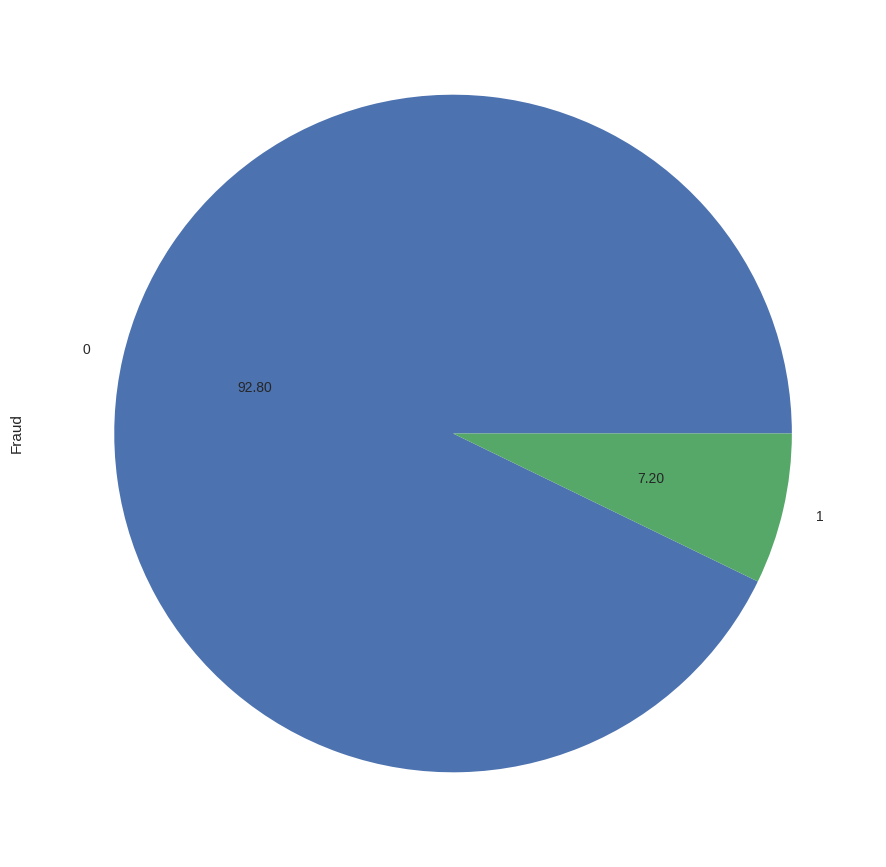

In [ ]:
# @title Handling imbalanced First Dataset
df = pd.read_csv("./CreditCardData.csv")
# df
x = df.drop(['Fraud'], axis =1)
y = df['Fraud']

y.value_counts()

# 0    92805
# 1     7195

# Show pie plot

y.value_counts().plot.pie(autopct='%.2f')

<Axes: ylabel='fraud'>

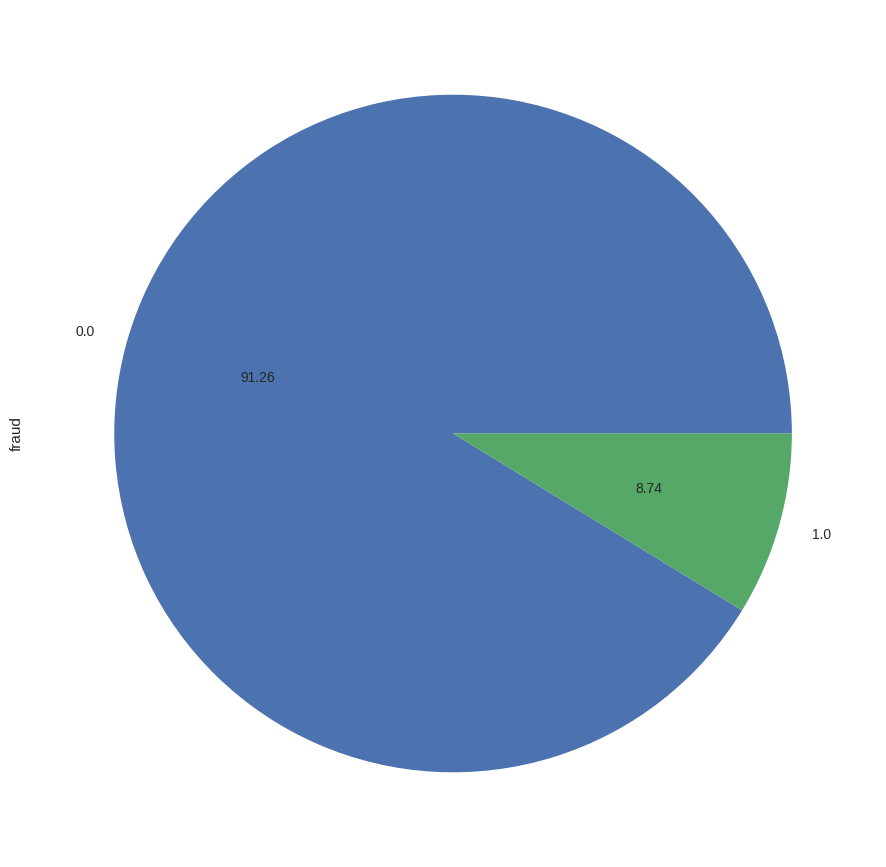

In [ ]:
# @title Handling imbalanced Second Dataset
data2 = pd.read_csv("./card_transdata.csv")
# df
x = data2.drop(['fraud'], axis =1)
y = data2['fraud']

# y.value_counts()

# 0.0    912597
# 1.0     87403

# Show pie plot

y.value_counts().plot.pie(autopct='%.2f')

Count of missing values Before Dropping:
 id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


<Axes: ylabel='Class'>

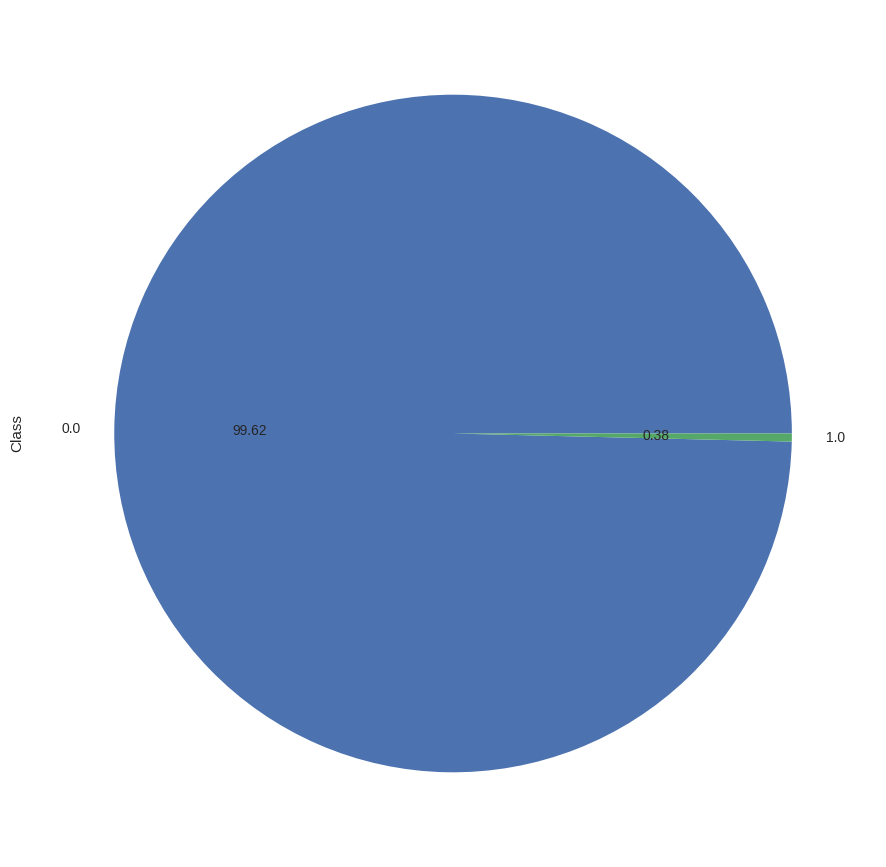

In [ ]:
# @title Handling imbalanced Third Dataset
data3 = pd.read_csv("./creditcard_2023.csv")
# df
x = data3.drop(['id','Class'], axis =1)
y = data3['Class']

y.value_counts()

# 0    284315
# 1    284315

# Show pie plot
# Handling Missing Values
print("Count of missing values Before Dropping:\n",data3.isna().sum())
# df = df.dropna()

y.value_counts().plot.pie(autopct='%.2f')



In [ ]:
# @title Preprocessing Second Dataset (card_transdataset)

df2 = pd.read_csv("./card_transdata.csv")

# Assuming df2 is your DataFrame
num_records = df2.shape

print(f"The dataset has {num_records} records.")


# Handling Missing Values
# print("Count of missing values Before Dropping:\n",df2.isna().sum())

# Normalize numerical columns
numerical_columns = ['distance_from_home']
scaler = StandardScaler()
data2 = df2.copy()
data2[numerical_columns] = scaler.fit_transform(data2[numerical_columns])

# Display the modified data
data2.head()

The dataset has (1000000, 8) records.


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,0.477882,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,-0.241607,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,-0.329369,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,-0.372854,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,0.268572,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [ ]:
# @title Preprocessing Third Dataset (creditcard_2023)

df3 = pd.read_csv("./creditcard_2023.csv")
df3.head()

# Handling Missing Values
# print("Count of missing values Before Dropping:\n",df2.isna().sum())

# # Normalize numerical columns


# # Display the modified data
# data.head()
data3 = df3.copy()
sampled_data = data3.sample(frac=0.1, random_state=123)

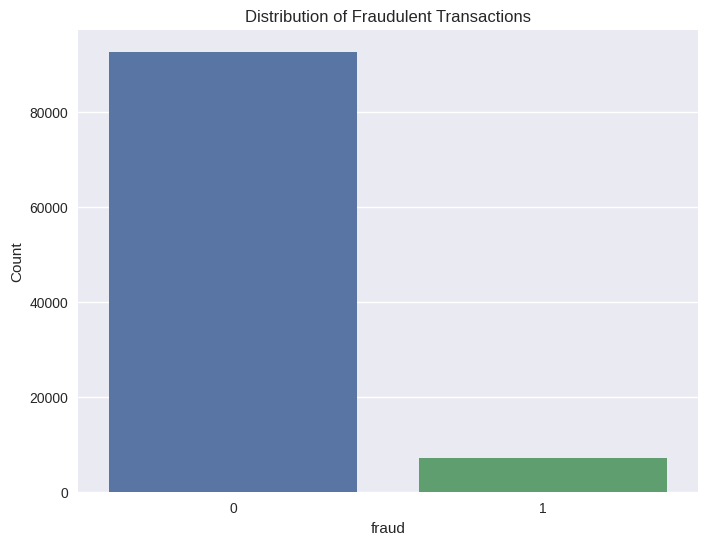

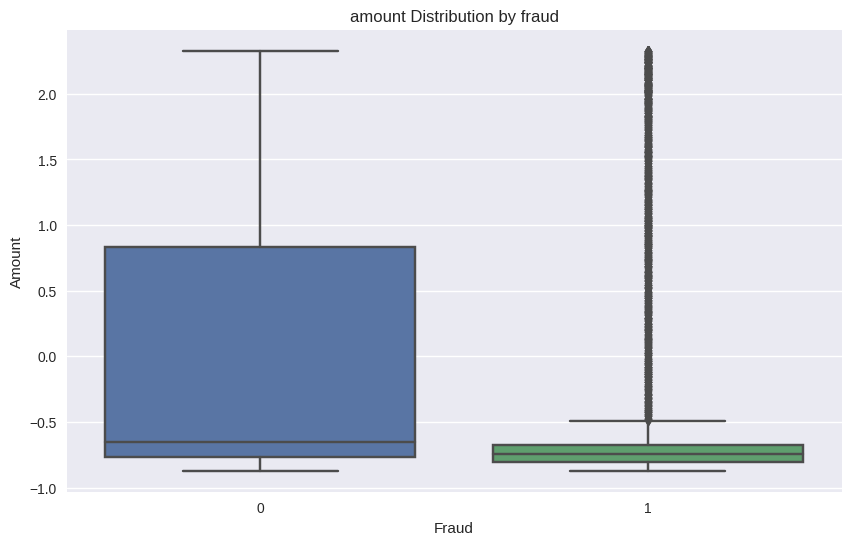

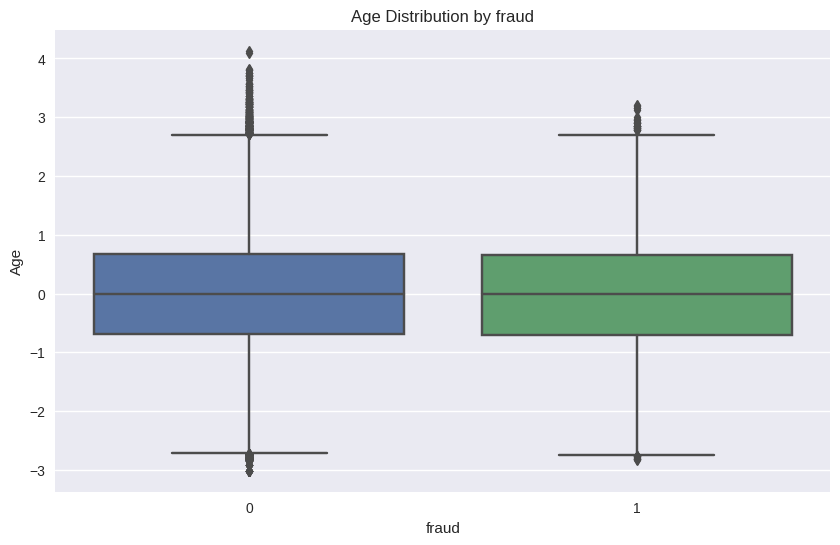

<ipython-input-95-8fe9fa15ab18>:32: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="BuPu", annot=True)


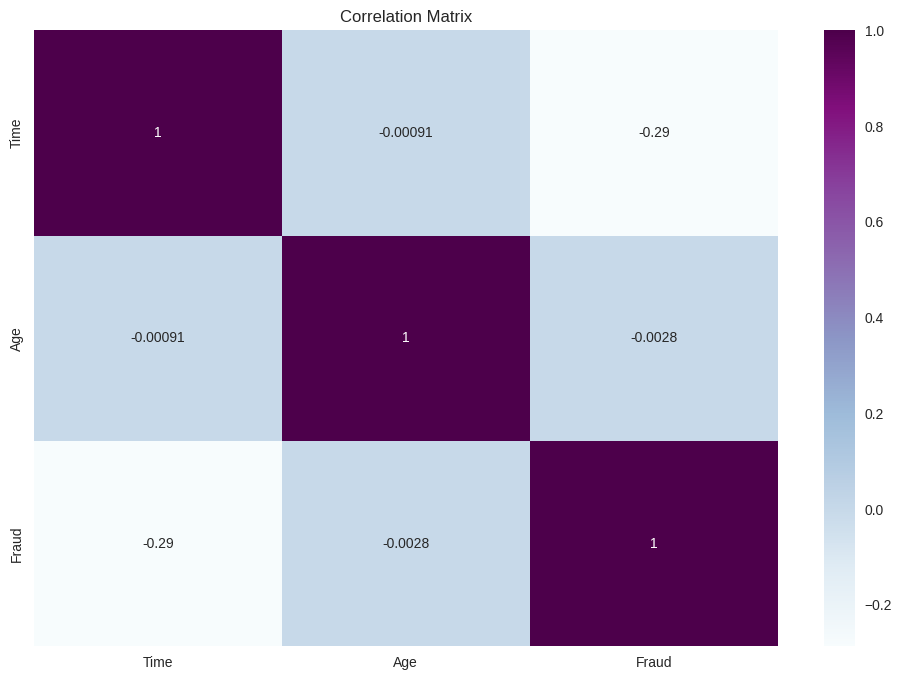

In [ ]:
# @title Distributions Of First Dataset (CreditCardData)

# Distribution of Fraudulent Transactions
plt.figure(figsize=(8, 6))
sns.countplot(x='Fraud', data=data)
plt.title("Distribution of Fraudulent Transactions")
plt.xlabel("fraud")
plt.ylabel("Count")
plt.show()

# Amount Distribution by Fraud
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fraud', y='Amount', data=data)
plt.title("amount Distribution by fraud")
plt.xlabel("Fraud")
plt.ylabel("Amount")
plt.show()


# Age Distribution by Fraud
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fraud', y='Age', data=data)
plt.title("Age Distribution by fraud")
plt.xlabel("fraud")
plt.ylabel("Age")
plt.show()

#CorrelationMatrix

corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap="BuPu", annot=True)
plt.title("Correlation Matrix")
plt.show()

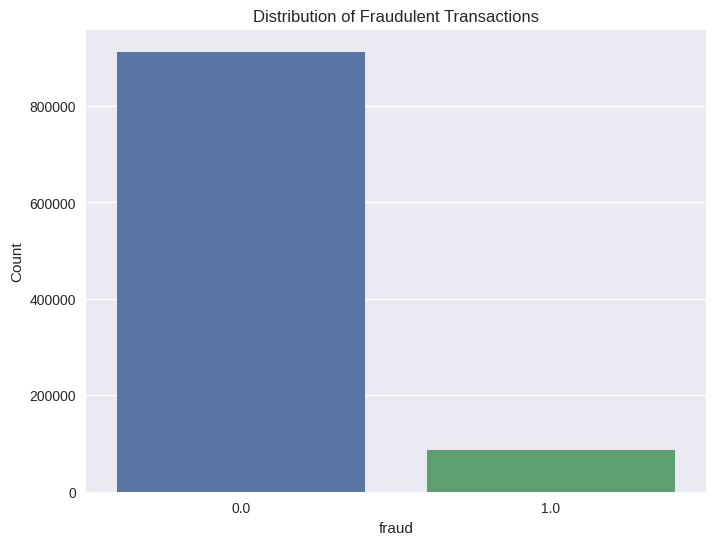

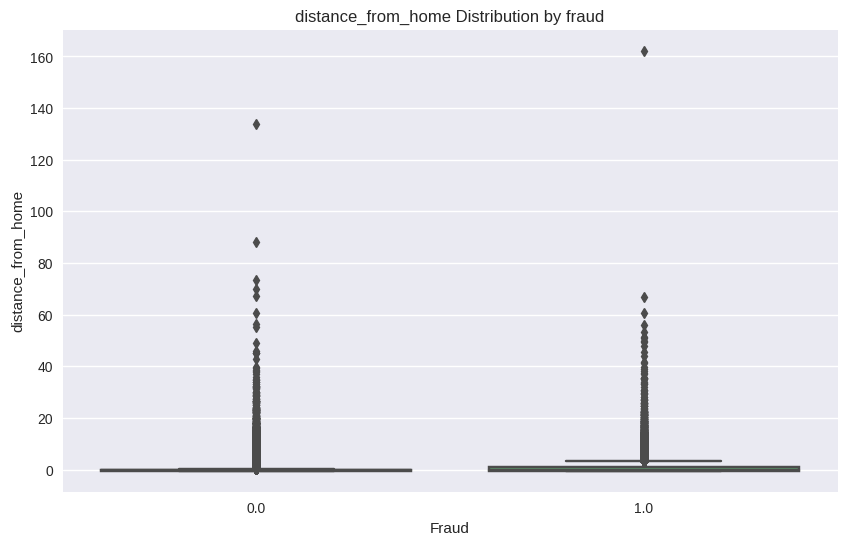

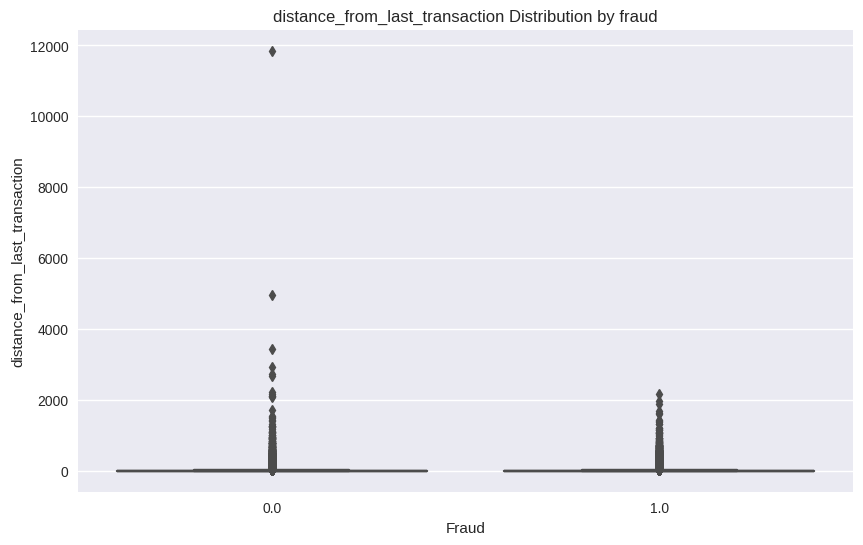

<ipython-input-96-767fd09499b8>:33: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="BuPu", annot=True)


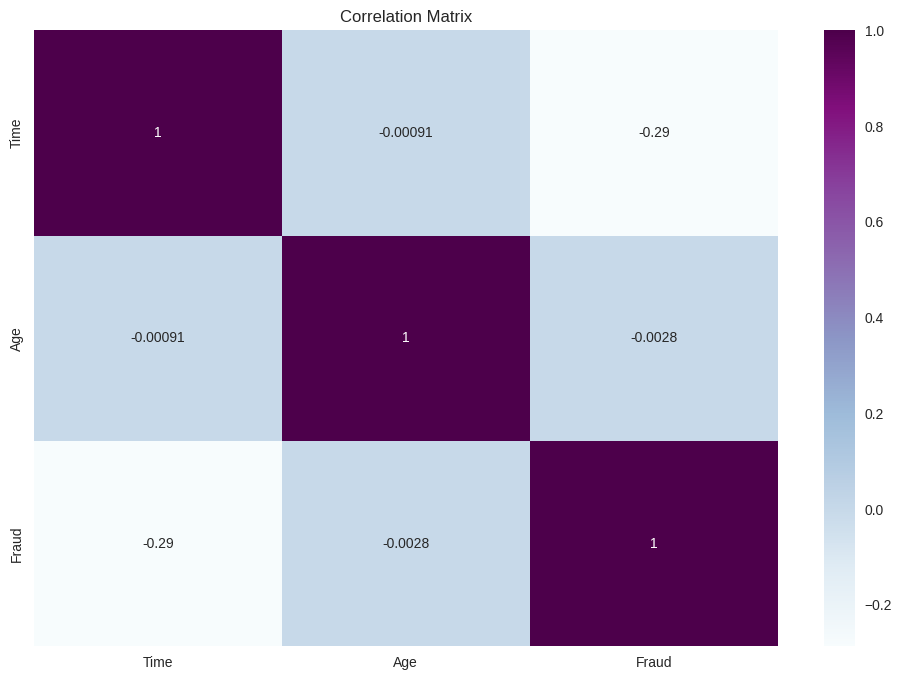

In [ ]:
# @title Distributions Of Second Dataset (card_transdata)

# Distribution of Fraudulent Transactions
plt.figure(figsize=(8, 6))
sns.countplot(x='fraud', data=data2)
plt.title("Distribution of Fraudulent Transactions")
plt.xlabel("fraud")
plt.ylabel("Count")
plt.show()


# distance_from_home Distribution by Fraud
plt.figure(figsize=(10, 6))
sns.boxplot(x='fraud', y='distance_from_home', data=data2)
plt.title("distance_from_home Distribution by fraud")
plt.xlabel("Fraud")
plt.ylabel("distance_from_home")
plt.show()


# distance_from_last_transaction Distribution by Fraud
plt.figure(figsize=(10, 6))
sns.boxplot(x='fraud', y='distance_from_last_transaction', data=data2)
plt.title("distance_from_last_transaction Distribution by fraud")
plt.xlabel("Fraud")
plt.ylabel("distance_from_last_transaction")
plt.show()

#CorrelationMatrix

corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap="BuPu", annot=True)
plt.title("Correlation Matrix")
plt.show()

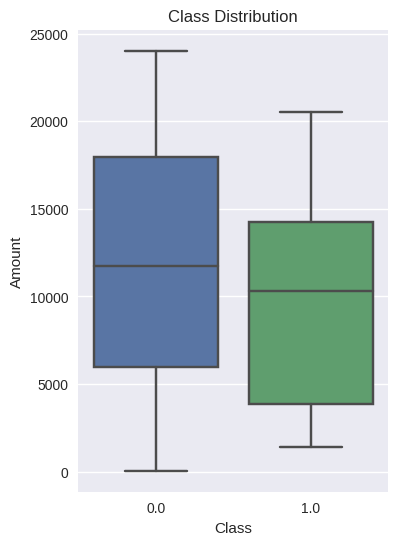

<ipython-input-97-fc39696e77c1>:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


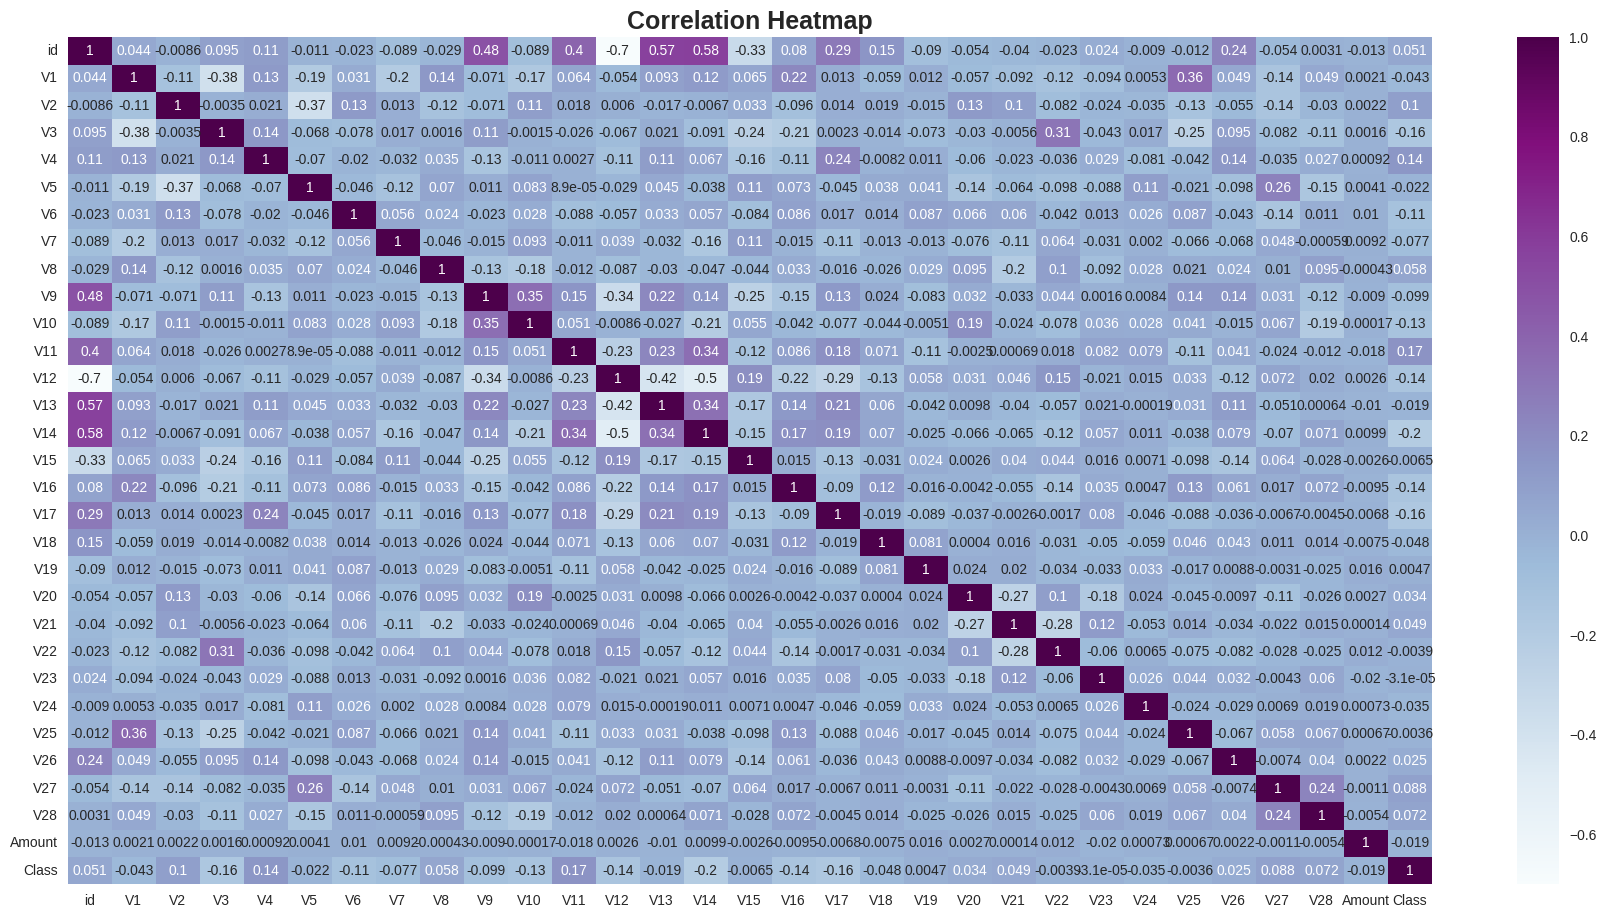

In [ ]:
# @title Distributions Of Third data set(creditCard_2023)

#distribution

#print(df3['Class'].value_counts())
plt.figure(figsize=(4, 6))
sns.boxplot(x='Class',y='Amount', data=df3)
plt.title('Class Distribution')
plt.show()


#CORRELATION heatmap
plt.style.use("seaborn")

plt.rcParams['figure.figsize']= (22,11)

plt.title("Correlation Heatmap",fontsize=18, weight= 'bold')

sns.heatmap(df3.corr(), cmap="BuPu", annot=True)

plt.show()

In [ ]:
# @title Splitting the first Dataset into features - target & Training - Testing

# Splitting data into features (x) - target (y)

X = data.drop('Fraud', axis=1)
y = data['Fraud']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# @title Splitting the third Dataset into features - target & Training - Testing

# Splitting data into features (x) - target (y)
print(data3.head())
X3 = sampled_data.drop(['Class', 'id'], axis=1)
y3 = sampled_data['Class']

# Splitting data into train and test sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)

   id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959  0.126280   
1 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395  0.190090   
2 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045 -1.154666 -0.605564   
3 -0.065130 -0.205698  ... -0.146927 -0.038212 -0.214048 -1.893131  1.003963   
4 -0.212660  1.049921  ... -0.106984  0.729727 -0.161666  0.312561 -0.414116   

        V26       V27       V28    Amount  C

   Time    Amount       Age  Fraud  Day  Month  Year  Day of Week_Thursday  \
0    19 -0.871551 -1.989692      0   14     10  2020                     0   
1    17  1.421153  0.463045      0   14     10  2020                     0   
2    14 -0.871551 -0.280818      0   14     10  2020                     0   
3    14 -0.685218  0.603776      0   13     10  2020                     0   
4    23 -0.174828 -0.703010      1   13     10  2020                     0   

   Day of Week_Tuesday  Day of Week_Wednesday  ...  Country of Residence_USA  \
0                    0                      1  ...                         0   
1                    0                      1  ...                         1   
2                    0                      1  ...                         0   
3                    1                      0  ...                         0   
4                    1                      0  ...                         0   

   Country of Residence_United Kingdom  Gender_M  

Fraud
0    7100
1    7100
dtype: int64

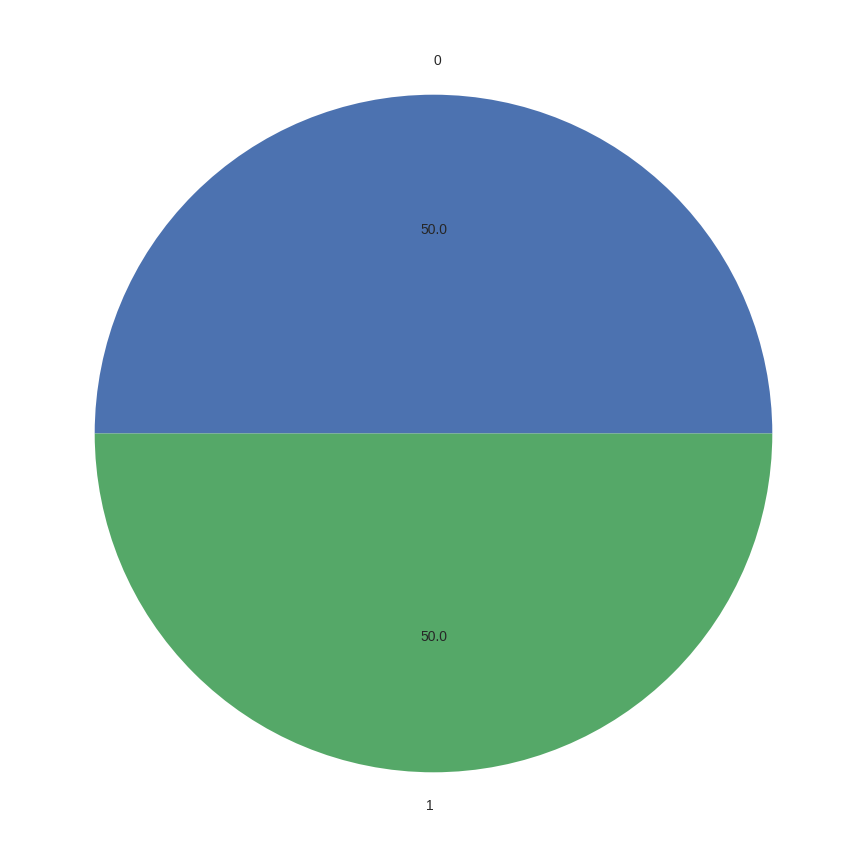

In [ ]:
# @title Resmapling the First Dataset
print(data.head())
real = data[data["Fraud"] == 0]
fraud = data[data["Fraud"] == 1]

real_resample = real.sample(n=7100, random_state=123)
fraud_resample = fraud.sample(n=7100, random_state=123)


df0 = pd.concat([real_resample, fraud_resample], axis = 0)
df0.value_counts("Fraud").plot.pie(autopct = "%.1f")
df0.value_counts("Fraud")

# Fraud
# 0    7195
# 1    7195

In [ ]:
# @title Combining the First Dataset after resmapling
# Combine the resampled dataframes into a single dataframe

combined_data = pd.concat([real_resample, fraud_resample], ignore_index=True)

# Shuffle the combined dataframe
combined_data = combined_data.sample(frac=1, random_state=123).reset_index(drop=True)

# Check the combined dataframe
print(combined_data.head())

# Separate features (X) and target variable (y)
X_resampled = combined_data.drop('Fraud', axis=1)
y_resampled = combined_data['Fraud']


# Split the resampled data into training and testing sets
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42)

# Check the shape of the resulting sets
print("X_train_resampled shape:", X_train_resampled.shape)
print("y_train_resampled shape:", y_train_resampled.shape)
print("X_test_resampled shape:", X_test_resampled.shape)
print("y_test_resampled shape:", y_test_resampled.shape)

   Time    Amount       Age  Fraud  Day  Month  Year  Day of Week_Thursday  \
0    21 -0.741928 -0.079774      0   13     10  2020                     0   
1     3 -0.733827 -1.095046      1   13     10  2020                     0   
2     5 -0.766233 -0.481862      1   13     10  2020                     0   
3    18  0.149229  1.066177      0   14     10  2020                     0   
4     4  0.084417  0.251949      1   14     10  2020                     0   

   Day of Week_Tuesday  Day of Week_Wednesday  ...  Country of Residence_USA  \
0                    1                      0  ...                         0   
1                    1                      0  ...                         0   
2                    1                      0  ...                         0   
3                    0                      1  ...                         0   
4                    0                      1  ...                         0   

   Country of Residence_United Kingdom  Gender_M  

fraud
0.0    87403
1.0    87403
dtype: int64

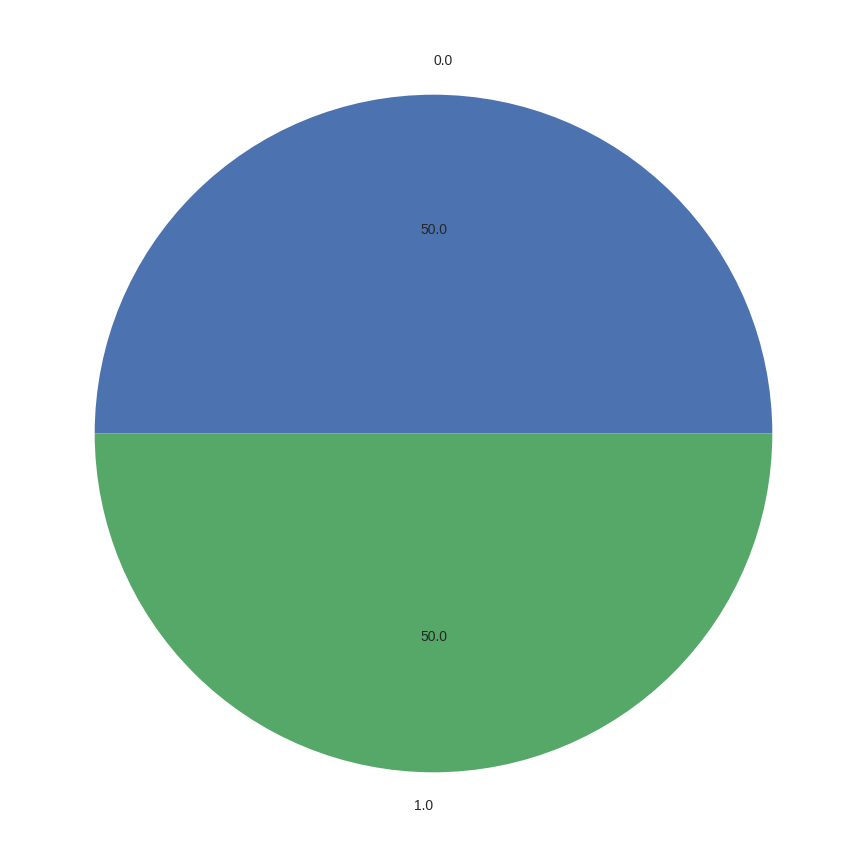

In [ ]:
# @title Resmapling the Second Dataset

real = data2[data2["fraud"] == 0]
fraud = data2[data2["fraud"] == 1]

real_resample2 = real.sample(n = 87403, random_state = 123)
fraud_resample2 = fraud.sample(n = 87403, random_state = 123)

df1 = pd.concat([real_resample2, fraud_resample2], axis = 0)
df1.value_counts("fraud").plot.pie(autopct = "%.1f")
df1.value_counts("fraud")

# fraud
# 0.0    87403
# 1.0    87403

In [ ]:
# @title Combining the second Dataset after resmapling
# Combine the resampled dataframes into a single dataframe
combined_data2 = pd.concat([real_resample2, fraud_resample2], ignore_index=True)
# Shuffle the combined dataframe
combined_data2 = combined_data2.sample(frac=1, random_state=123).reset_index(drop=True)

# Check the combined dataframe
print(combined_data2.head())

# Separate features (X) and target variable (y)
X_resampled2 = combined_data2.drop('fraud', axis=1)
y_resampled2 = combined_data2['fraud']

# Split the resampled data into training and testing sets
X_train_resampled2, X_test_resampled2, y_train_resampled2, y_test_resampled2 = train_test_split(
    X_resampled2, y_resampled2, test_size=0.2, random_state=42)

# Check the shape of the resulting sets
print("X_train_resampled shape:", X_train_resampled2.shape)
print("y_train_resampled shape:", y_train_resampled2.shape)
print("X_test_resampled shape:", X_test_resampled2.shape)
print("y_test_resampled shape:", y_test_resampled2.shape)

   distance_from_home  distance_from_last_transaction  \
0           -0.340509                       39.380672   
1            2.504668                        1.354384   
2           -0.312194                        4.447484   
3            0.188773                        1.613424   
4           -0.388873                        0.410973   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        0.678235              1.0        0.0   
1                        1.303063              1.0        0.0   
2                       12.589043              1.0        0.0   
3                        4.185931              1.0        1.0   
4                        1.311406              0.0        0.0   

   used_pin_number  online_order  fraud  
0              0.0           1.0    0.0  
1              0.0           1.0    1.0  
2              0.0           1.0    1.0  
3              0.0           1.0    1.0  
4              0.0           1.0    0.0  
X_train_resamp

## **Models**

Decision Tree Classifier Accuracy: 92.25%

Confusion Matrix:
[[1165  217]
 [   3 1455]]


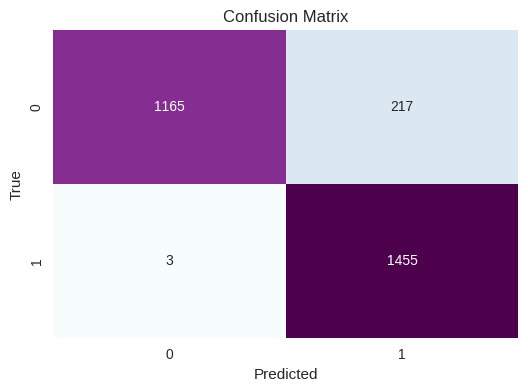

Decision Tree Classifier Training Accuracy: 91.36%
Decision Tree Classifier Testing Accuracy: 92.25%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.84      0.91      1382
           1       0.87      1.00      0.93      1458

    accuracy                           0.92      2840
   macro avg       0.93      0.92      0.92      2840
weighted avg       0.93      0.92      0.92      2840


Model Metrics:
Accuracy: 0.9225
Precision: 0.9321
Recall: 0.9225
F1 Score: 0.9219


In [ ]:
# @title Decision Tree Classifier For first dataset

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create and fit the Decision Tree model
decision_tree_model = DecisionTreeClassifier(max_depth=2, min_samples_split=2)
decision_tree_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_decision_tree = decision_tree_model.predict(X_test_resampled)

# Calculate accuracy
accuracy_decision_tree = accuracy_score(y_test_resampled, y_pred_decision_tree)
print("Decision Tree Classifier Accuracy: {:.2%}".format(accuracy_decision_tree))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test_resampled, y_pred_decision_tree)
print("\nConfusion Matrix:")
print(conf_matrix)

# Display the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='BuPu', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Extract metrics from classification report
class_report = classification_report(y_test_resampled, y_pred_decision_tree, output_dict=True)
precision = class_report['weighted avg']['precision']
recall = class_report['weighted avg']['recall']
f1 = class_report['weighted avg']['f1-score']


# Make predictions on the training set
y_pred_train = decision_tree_model.predict(X_train_resampled)

# Make predictions on the test set
y_pred_test = decision_tree_model.predict(X_test_resampled)

# Calculate accuracy for training set
accuracy_train = accuracy_score(y_train_resampled, y_pred_train)
print("Decision Tree Classifier Training Accuracy: {:.2%}".format(accuracy_train))

# Calculate accuracy for test set
accuracy_test = accuracy_score(y_test_resampled, y_pred_test)
print("Decision Tree Classifier Testing Accuracy: {:.2%}".format(accuracy_test))

# Print classification report (precision, recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test_resampled, y_pred_decision_tree))

# Print model metrics
print("\nModel Metrics:")
print(f'Accuracy: {accuracy_decision_tree:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


In [ ]:
# @title Applying 10 folds for First Dataset
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

# Specify the number of folds (k=10 for 10-fold cross-validation)
decision_tree_classifier = DecisionTreeClassifier()  # You can customize parameters here
num_folds = 10

# Specify the cross-validation strategy (StratifiedKFold is commonly used)
cv_strategy = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=123)

# Perform 10-fold cross-validation and get accuracy scores for each fold
accuracy_scores_tree = cross_val_score(decision_tree_classifier, X_resampled, y_resampled, cv=cv_strategy, scoring='accuracy')

# Print the accuracy scores for each fold
for fold, accuracy in enumerate(accuracy_scores_tree, start=1):
    print(f'Fold {fold}: Accuracy = {accuracy:.4f}')

# Print the average accuracy across all folds
average_accuracy_tree = np.mean(accuracy_scores_tree)
print(f'\nAverage Accuracy: {average_accuracy_tree:.4f}')

Fold 1: Accuracy = 0.9338
Fold 2: Accuracy = 0.9359
Fold 3: Accuracy = 0.9239
Fold 4: Accuracy = 0.9324
Fold 5: Accuracy = 0.9331
Fold 6: Accuracy = 0.9296
Fold 7: Accuracy = 0.9373
Fold 8: Accuracy = 0.9458
Fold 9: Accuracy = 0.9366
Fold 10: Accuracy = 0.9437

Average Accuracy: 0.9352


Decision Tree Classifier Accuracy: 93.18%

Confusion Matrix:
[[15997  1334]
 [ 1051 16580]]


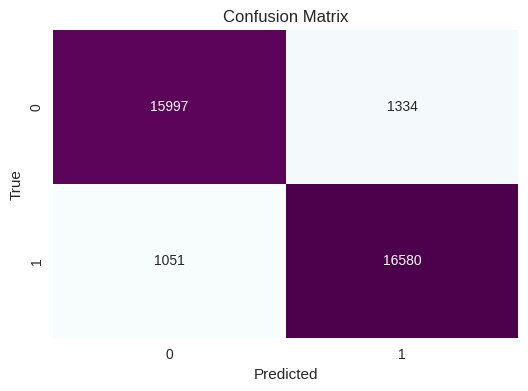

Decision Tree Classifier Training Accuracy: 93.57%
Decision Tree Classifier Testing Accuracy: 93.18%

Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93     17331
         1.0       0.93      0.94      0.93     17631

    accuracy                           0.93     34962
   macro avg       0.93      0.93      0.93     34962
weighted avg       0.93      0.93      0.93     34962


Model Metrics:
Accuracy: 0.9318
Precision: 0.9319
Recall: 0.9318
F1 Score: 0.9318


In [ ]:
# @title Decision Tree Classifier For Second dataset

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create and fit the Decision Tree model
decision_tree_model = DecisionTreeClassifier(max_depth=2, min_samples_split=2)
decision_tree_model.fit(X_train_resampled2, y_train_resampled2)

# Make predictions on the test set
y_pred_decision_tree = decision_tree_model.predict(X_test_resampled2)

# Calculate accuracy
accuracy_decision_tree = accuracy_score(y_test_resampled2, y_pred_decision_tree)
print("Decision Tree Classifier Accuracy: {:.2%}".format(accuracy_decision_tree))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test_resampled2, y_pred_decision_tree)
print("\nConfusion Matrix:")
print(conf_matrix)

# Display the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='BuPu', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Extract metrics from classification report
class_report = classification_report(y_test_resampled2, y_pred_decision_tree, output_dict=True)
precision = class_report['weighted avg']['precision']
recall = class_report['weighted avg']['recall']
f1 = class_report['weighted avg']['f1-score']

# Make predictions on the training set
y_pred_train = decision_tree_model.predict(X_train_resampled2)

# Make predictions on the test set
y_pred_test = decision_tree_model.predict(X_test_resampled2)

# Calculate accuracy for training set
accuracy_train = accuracy_score(y_train_resampled2, y_pred_train)
print("Decision Tree Classifier Training Accuracy: {:.2%}".format(accuracy_train))

# Calculate accuracy for test set
accuracy_test = accuracy_score(y_test_resampled2, y_pred_test)
print("Decision Tree Classifier Testing Accuracy: {:.2%}".format(accuracy_test))

# Print classification report (precision, recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test_resampled2, y_pred_decision_tree))

# Print model metrics
print("\nModel Metrics:")
print(f'Accuracy: {accuracy_decision_tree:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

In [ ]:
# @title Applying 10 folds for Second Dataset
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

# Specify the number of folds (k=10 for 10-fold cross-validation)
decision_tree_classifier = DecisionTreeClassifier()  # You can customize parameters here
num_folds = 10

# Specify the cross-validation strategy (StratifiedKFold is commonly used)
cv_strategy = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=123)

# Perform 10-fold cross-validation and get accuracy scores for each fold
accuracy_scores_tree = cross_val_score(decision_tree_classifier, X_resampled2, y_resampled2, cv=cv_strategy, scoring='accuracy')

# Print the accuracy scores for each fold
for fold, accuracy in enumerate(accuracy_scores_tree, start=1):
    print(f'Fold {fold}: Accuracy = {accuracy:.4f}')

# Print the average accuracy across all folds
average_accuracy_tree = np.mean(accuracy_scores_tree)
print(f'\nAverage Accuracy: {average_accuracy_tree:.4f}')

Fold 1: Accuracy = 0.9999
Fold 2: Accuracy = 0.9997
Fold 3: Accuracy = 1.0000
Fold 4: Accuracy = 0.9999
Fold 5: Accuracy = 0.9999
Fold 6: Accuracy = 1.0000
Fold 7: Accuracy = 0.9998
Fold 8: Accuracy = 1.0000
Fold 9: Accuracy = 0.9999
Fold 10: Accuracy = 1.0000

Average Accuracy: 0.9999


Decision Tree Classifier Accuracy: 100.00%

Confusion Matrix:
[[185]]


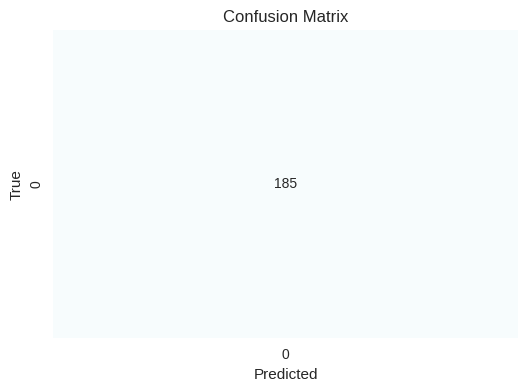

Decision Tree Classifier Training Accuracy: 100.00%
Decision Tree Classifier Testing Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       185

    accuracy                           1.00       185
   macro avg       1.00      1.00      1.00       185
weighted avg       1.00      1.00      1.00       185


Model Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


In [ ]:
# @title Decision Tree Classifier For Third dataset

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create and fit the Decision Tree model
decision_tree_model = DecisionTreeClassifier(max_depth=2, min_samples_split=2)
decision_tree_model.fit(X_train3, y_train3)

# Make predictions on the test set
y_pred_decision_tree = decision_tree_model.predict(X_test3)

# Calculate accuracy
accuracy_decision_tree = accuracy_score(y_test3, y_pred_decision_tree)
print("Decision Tree Classifier Accuracy: {:.2%}".format(accuracy_decision_tree))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test3, y_pred_decision_tree)
print("\nConfusion Matrix:")
print(conf_matrix)

# Display the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='BuPu', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Extract metrics from classification report
class_report = classification_report(y_test3, y_pred_decision_tree, output_dict=True)
precision = class_report['weighted avg']['precision']
recall = class_report['weighted avg']['recall']
f1 = class_report['weighted avg']['f1-score']


# Make predictions on the training set
y_pred_train = decision_tree_model.predict(X_train3)

# Make predictions on the test set
y_pred_test = decision_tree_model.predict(X_test3)

# Calculate accuracy for training set
accuracy_train = accuracy_score(y_train3, y_pred_train)
print("Decision Tree Classifier Training Accuracy: {:.2%}".format(accuracy_train))

# Calculate accuracy for test set
accuracy_test = accuracy_score(y_test3, y_pred_test)
print("Decision Tree Classifier Testing Accuracy: {:.2%}".format(accuracy_test))

# Print classification report (precision, recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test3, y_pred_decision_tree))

# Print model metrics
print("\nModel Metrics:")
print(f'Accuracy: {accuracy_decision_tree:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

In [ ]:
# @title Applying 10 folds for Third Dataset
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

# Specify the number of folds (k=10 for 10-fold cross-validation)
decision_tree_classifier = DecisionTreeClassifier()  # You can customize parameters here
num_folds = 10

# Specify the cross-validation strategy (StratifiedKFold is commonly used)
cv_strategy = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=123)

# Perform 10-fold cross-validation and get accuracy scores for each fold
accuracy_scores_tree = cross_val_score(decision_tree_classifier, X3, y3, cv=cv_strategy, scoring='accuracy')

# Print the accuracy scores for each fold
for fold, accuracy in enumerate(accuracy_scores_tree, start=1):
    print(f'Fold {fold}: Accuracy = {accuracy:.4f}')

# Print the average accuracy across all folds
average_accuracy_tree = np.mean(accuracy_scores_tree)
print(f'\nAverage Accuracy: {average_accuracy_tree:.4f}')

Fold 1: Accuracy = 1.0000
Fold 2: Accuracy = 1.0000
Fold 3: Accuracy = 1.0000
Fold 4: Accuracy = 1.0000
Fold 5: Accuracy = 1.0000
Fold 6: Accuracy = 1.0000
Fold 7: Accuracy = 1.0000
Fold 8: Accuracy = 1.0000
Fold 9: Accuracy = 1.0000
Fold 10: Accuracy = 1.0000

Average Accuracy: 1.0000


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


In [ ]:
# @title Logistic Regression Classifier For first dataset

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Standardize the features (optional but often recommended)
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test_resampled = scaler.transform(X_test_resampled)

# Initialize the logistic regression model
logreg_model = LogisticRegression()

# Fit the model to the training data
logreg_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = logreg_model.predict(X_test_resampled)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test_resampled, y_pred)
conf_matrix = confusion_matrix(y_test_resampled, y_pred)
classification_report_str = classification_report(y_test_resampled, y_pred)

# Print the results
print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_report_str)

# Print model metrics
print("\nModel Metrics:")
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Accuracy: 0.9303
Confusion Matrix:
[[1297   85]
 [ 113 1345]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1382
           1       0.94      0.92      0.93      1458

    accuracy                           0.93      2840
   macro avg       0.93      0.93      0.93      2840
weighted avg       0.93      0.93      0.93      2840


Model Metrics:
Accuracy: 0.9303
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


In [ ]:
# @title Applying 10 folds for First Dataset -Logistic Regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

# Standardize the features (optional but often recommended)
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)

# Initialize the logistic regression model
logreg_model = LogisticRegression()

# Specify the number of folds (k=10 for 10-fold cross-validation)
num_folds = 10
cv_strategy = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=123)

# Perform 10-fold cross-validation and get accuracy scores for each fold
accuracy_scores = cross_val_score(logreg_model, X_resampled, y_resampled, cv=cv_strategy, scoring='accuracy')

# Print the accuracy scores for each fold
for fold, accuracy in enumerate(accuracy_scores, start=1):
    print(f'Fold {fold}: Accuracy = {accuracy:.4f}')

# Print the average accuracy across all folds
average_accuracy = np.mean(accuracy_scores)
print(f'\nAverage Accuracy: {average_accuracy:.4f}')

# Optionally, you can also print other metrics like precision, recall, and F1 score
# For simplicity, I'll just print accuracy here

# Make predictions on the test data
logreg_model.fit(X_train_resampled, y_train_resampled)
y_pred = logreg_model.predict(X_test_resampled)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test_resampled, y_pred)
conf_matrix = confusion_matrix(y_test_resampled, y_pred)
classification_report_str = classification_report(y_test_resampled, y_pred)

# Print the results
print('\nPerformance on Test Set:')
print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_report_str)

Fold 1: Accuracy = 0.9303
Fold 2: Accuracy = 0.9317
Fold 3: Accuracy = 0.9331
Fold 4: Accuracy = 0.9373
Fold 5: Accuracy = 0.9366
Fold 6: Accuracy = 0.9331
Fold 7: Accuracy = 0.9444
Fold 8: Accuracy = 0.9542
Fold 9: Accuracy = 0.9415
Fold 10: Accuracy = 0.9359

Average Accuracy: 0.9378

Performance on Test Set:
Accuracy: 0.9303
Confusion Matrix:
[[1297   85]
 [ 113 1345]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1382
           1       0.94      0.92      0.93      1458

    accuracy                           0.93      2840
   macro avg       0.93      0.93      0.93      2840
weighted avg       0.93      0.93      0.93      2840



In [ ]:
# @title Logistic regression for second dataset

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Standardize the features (optional but often recommended)
scaler = StandardScaler()
X_train_resampled2 = scaler.fit_transform(X_train_resampled2)
X_test_resampled2 = scaler.transform(X_test_resampled2)

# Initialize the logistic regression model
logreg_model = LogisticRegression()

# Fit the model to the training data
logreg_model.fit(X_train_resampled2, y_train_resampled2)

# Make predictions on the test data
y_pred2 = logreg_model.predict(X_test_resampled2)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test_resampled2, y_pred2)
conf_matrix = confusion_matrix(y_test_resampled2, y_pred2)
classification_report_str = classification_report(y_test_resampled2, y_pred2)

# Calculate specificity
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# Print the results
print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_report_str)
# Print the results
print(f'Specificity: {specificity:.4f}')

# Print model metrics
print("\nModel Metrics:")
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Specificity: {specificity:.4f}')



Accuracy: 0.9414
Confusion Matrix:
[[16184  1147]
 [  902 16729]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94     17331
         1.0       0.94      0.95      0.94     17631

    accuracy                           0.94     34962
   macro avg       0.94      0.94      0.94     34962
weighted avg       0.94      0.94      0.94     34962

Specificity: 0.9338

Model Metrics:
Accuracy: 0.9414
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Specificity: 0.9338


In [ ]:
# @title Applying 10 folds for Second Dataset -Logistic Regression

# @title Applying 10 folds for First Dataset
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
import numpy as np

# Specify the number of folds (k=10 for 10-fold cross-validation)
logreg_model = LogisticRegression()  # You can customize parameters here
num_folds = 10

# Specify the cross-validation strategy (StratifiedKFold is commonly used)
cv_strategy = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=123)

# Perform 10-fold cross-validation and get accuracy scores for each fold
accuracy_scores_tree = cross_val_score(logreg_model, X_resampled2, y_resampled2, cv=cv_strategy, scoring='accuracy')
precision = cross_val_score(logreg_model, X_resampled2, y_resampled2, cv=cv_strategy, scoring=make_scorer(precision_score))
recall = cross_val_score(logreg_model, X_resampled2, y_resampled2, cv=cv_strategy, scoring=make_scorer(recall_score))
f1 = cross_val_score(logreg_model, X_resampled2, y_resampled2, cv=cv_strategy, scoring=make_scorer(f1_score))
# # Perform cross-validation predictions
# predictions = cross_val_predict(logreg_model, X_resampled, y_resampled, cv=cv_strategy)

# # Calculate specificity
# tn, fp, _, _ = confusion_matrix(y_resampled, predictions).ravel()
# specificity = tn / (tn + fp)

# Print specificity
print(f'Specificity: {specificity}')

# Print the accuracy scores for each fold
for fold, accuracy in enumerate(accuracy_scores_tree, start=1):
    print(f'Fold {fold}: Accuracy = {accuracy:.4f}')

# Print the average accuracy across all folds
average_accuracy_tree = np.mean(accuracy_scores_tree)
print(f'\nAverage Accuracy: {average_accuracy_tree:.4f}')
print(f'Average Precision: {precision.mean()}')
print(f'Average Recall: {recall.mean()}')
print(f'Average F1-score: {f1.mean()}')
# print(f'Specificity: {specificity.mean()}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Specificity: 0.9338180139634181
Fold 1: Accuracy = 0.9395
Fold 2: Accuracy = 0.9410
Fold 3: Accuracy = 0.9389
Fold 4: Accuracy = 0.9429
Fold 5: Accuracy = 0.9414
Fold 6: Accuracy = 0.9431
Fold 7: Accuracy = 0.9408
Fold 8: Accuracy = 0.9457
Fold 9: Accuracy = 0.9413
Fold 10: Accuracy = 0.9377

Average Accuracy: 0.9412
Average Precision: 0.9337872524759063
Average Recall: 0.9498186274368641
Average F1-score: 0.9417302732817721


In [ ]:
# @title Logistic Regression Classifier For Third dataset

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Standardize the features (optional but often recommended)
scaler = StandardScaler()
X_train3 = scaler.fit_transform(X_train3)
X_test3 = scaler.transform(X_test3)

# Initialize the logistic regression model
logreg_model = LogisticRegression()

# Fit the model to the training data
logreg_model.fit(X_train3, y_train3)

# Make predictions on the test data
y_pred = logreg_model.predict(X_test3)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test3, y_pred)
conf_matrix = confusion_matrix(y_test3, y_pred)
classification_report_str = classification_report(y_test3, y_pred)

# Print the results
print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_report_str)

Accuracy: 1.0000
Confusion Matrix:
[[185]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       185

    accuracy                           1.00       185
   macro avg       1.00      1.00      1.00       185
weighted avg       1.00      1.00      1.00       185



In [ ]:
# @title Applying 10 folds for Third Dataset -Logistic Regression
# @title Applying 10 folds for First Dataset
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
import numpy as np

# Specify the number of folds (k=10 for 10-fold cross-validation)
logreg_model = LogisticRegression()  # You can customize parameters here
num_folds = 10

# Specify the cross-validation strategy (StratifiedKFold is commonly used)
cv_strategy = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=123)


# Perform 10-fold cross-validation and get accuracy scores for each fold
accuracy_scores_tree = cross_val_score(logreg_model, X3, y3, cv=cv_strategy, scoring='accuracy')
precision = cross_val_score(logreg_model, X3, y3, cv=cv_strategy, scoring=make_scorer(precision_score))
recall = cross_val_score(logreg_model, X3, y3, cv=cv_strategy, scoring=make_scorer(recall_score))
f1 = cross_val_score(logreg_model, X3, y3, cv=cv_strategy, scoring=make_scorer(f1_score))
# # Perform cross-validation predictions
# predictions = cross_val_predict(logreg_model, X_resampled, y_resampled, cv=cv_strategy)

# # Calculate specificity
# tn, fp, _, _ = confusion_matrix(y_resampled, predictions).ravel()
# specificity = tn / (tn + fp)

# Print specificity
print(f'Specificity: {specificity}')

# Print the accuracy scores for each fold
for fold, accuracy in enumerate(accuracy_scores_tree, start=1):
    print(f'Fold {fold}: Accuracy = {accuracy:.4f}')

# Print the average accuracy across all folds
average_accuracy_tree = np.mean(accuracy_scores_tree)
print(f'\nAverage Accuracy: {average_accuracy_tree:.4f}')
print(f'Average Precision: {precision.mean()}')
print(f'Average Recall: {recall.mean()}')
print(f'Average F1-score: {f1.mean()}')
# print(f'Specificity: {specificity.mean()}')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/mod

Specificity: 0.9338180139634181
Fold 1: Accuracy = 1.0000
Fold 2: Accuracy = 1.0000
Fold 3: Accuracy = 1.0000
Fold 4: Accuracy = 1.0000
Fold 5: Accuracy = 1.0000
Fold 6: Accuracy = 1.0000
Fold 7: Accuracy = 1.0000
Fold 8: Accuracy = 1.0000
Fold 9: Accuracy = 1.0000
Fold 10: Accuracy = 0.9891

Average Accuracy: 0.9989
Average Precision: 0.1
Average Recall: 0.1
Average F1-score: 0.1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


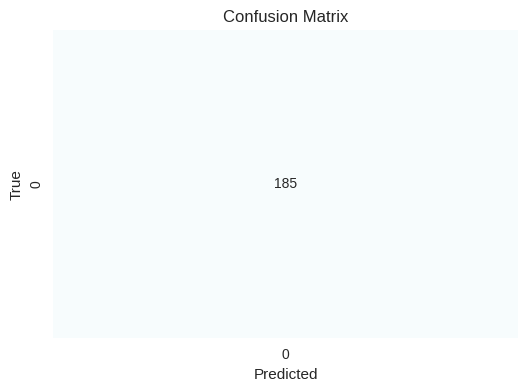

Random Forest Classifier Accuracy: 84.96%

Confusion Matrix:
[[1105  277]
 [ 150 1308]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1382
           1       0.83      0.90      0.86      1458

    accuracy                           0.85      2840
   macro avg       0.85      0.85      0.85      2840
weighted avg       0.85      0.85      0.85      2840


Model Metrics:
Accuracy: 0.8496
Precision: 0.8521
Recall: 0.8496
F1 Score: 0.8492


In [ ]:
# @title Random Forest Classifier For First Dataset

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create and fit the Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=2, min_samples_split=2, min_samples_leaf=1, max_features='auto', bootstrap=True, random_state=123)
random_forest_model.fit(X_train_resampled, y_train_resampled)
#displaying confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='BuPu', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Make predictions on the test set
y_pred_random_forest = random_forest_model.predict(X_test_resampled)

# Calculate accuracy
accuracy_random_forest = accuracy_score(y_test_resampled, y_pred_random_forest)
print("Random Forest Classifier Accuracy: {:.2%}".format(accuracy_random_forest))

# Print confusion matrix
conf_matrix_rf = confusion_matrix(y_test_resampled, y_pred_random_forest)
print("\nConfusion Matrix:")
print(conf_matrix_rf)

# Extract metrics from classification report
class_report_rf = classification_report(y_test_resampled, y_pred_random_forest, output_dict=True)
precision_rf = class_report_rf['weighted avg']['precision']
recall_rf = class_report_rf['weighted avg']['recall']
f1_rf = class_report_rf['weighted avg']['f1-score']

# Print classification report (precision, recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test_resampled, y_pred_random_forest))

# Print model metrics
print("\nModel Metrics:")
print(f'Accuracy: {accuracy_random_forest:.4f}')
print(f'Precision: {precision_rf:.4f}')
print(f'Recall: {recall_rf:.4f}')
print(f'F1 Score: {f1_rf:.4f}')

In [ ]:
# @title Applying 10 folds for First Dataset
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

# Specify the number of folds (k=10 for 10-fold cross-validation)
random_forest_model = RandomForestClassifier()
num_folds = 10

# Specify the cross-validation strategy (StratifiedKFold is commonly used)
cv_strategy = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=123)

# Perform 10-fold cross-validation and get accuracy scores for each fold
accuracy_scores_tree = cross_val_score(random_forest_model, X_resampled, y_resampled, cv=cv_strategy, scoring='accuracy')

# Print the accuracy scores for each fold
for fold, accuracy in enumerate(accuracy_scores_tree, start=1):
    print(f'Fold {fold}: Accuracy = {accuracy:.4f}')

# Print the average accuracy across all folds
average_accuracy_tree = np.mean(accuracy_scores_tree)
print(f'\nAverage Accuracy: {average_accuracy_tree:.4f}')

Fold 1: Accuracy = 0.9444
Fold 2: Accuracy = 0.9563
Fold 3: Accuracy = 0.9465
Fold 4: Accuracy = 0.9493
Fold 5: Accuracy = 0.9507
Fold 6: Accuracy = 0.9394
Fold 7: Accuracy = 0.9521
Fold 8: Accuracy = 0.9627
Fold 9: Accuracy = 0.9500
Fold 10: Accuracy = 0.9521

Average Accuracy: 0.9504


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


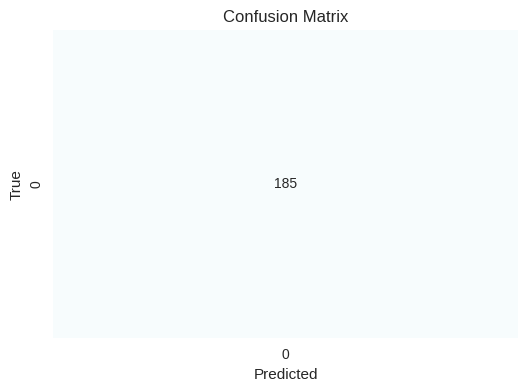

Random Forest Classifier Accuracy: 94.51%

Confusion Matrix:
[[16463   868]
 [ 1051 16580]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94     17331
         1.0       0.95      0.94      0.95     17631

    accuracy                           0.95     34962
   macro avg       0.95      0.95      0.95     34962
weighted avg       0.95      0.95      0.95     34962


Model Metrics:
Accuracy: 0.9451
Precision: 0.9452
Recall: 0.9451
F1 Score: 0.9451
Specificity: 0.9499


In [ ]:
# @title Random Forest Classifier For Second Dataset

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create and fit the Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=2, min_samples_split=2, min_samples_leaf=1, max_features='auto', bootstrap=True, random_state=123)
random_forest_model.fit(X_train_resampled2, y_train_resampled2)
#displaying confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='BuPu', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Make predictions on the test set
y_pred_random_forest = random_forest_model.predict(X_test_resampled2)

# Calculate accuracy
accuracy_random_forest = accuracy_score(y_test_resampled2, y_pred_random_forest)
print("Random Forest Classifier Accuracy: {:.2%}".format(accuracy_random_forest))

# Print confusion matrix
conf_matrix_rf = confusion_matrix(y_test_resampled2, y_pred_random_forest)
print("\nConfusion Matrix:")
print(conf_matrix_rf)

# Extract metrics from classification report
class_report_rf = classification_report(y_test_resampled2, y_pred_random_forest, output_dict=True)
precision_rf = class_report_rf['weighted avg']['precision']
recall_rf = class_report_rf['weighted avg']['recall']
f1_rf = class_report_rf['weighted avg']['f1-score']

# Print classification report (precision, recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test_resampled2, y_pred_random_forest))
#specificity
specificity_rf = conf_matrix_rf[0, 0] / (conf_matrix_rf[0, 0] + conf_matrix_rf[0, 1])

# Print model metrics
print("\nModel Metrics:")
print(f'Accuracy: {accuracy_random_forest:.4f}')
print(f'Precision: {precision_rf:.4f}')
print(f'Recall: {recall_rf:.4f}')
print(f'F1 Score: {f1_rf:.4f}')
print(f'Specificity: {specificity_rf:.4f}')

In [ ]:
# @title Applying 10 folds for Second Dataset
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

# Specify the number of folds (k=10 for 10-fold cross-validation)
random_forest_model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=2, min_samples_split=2, min_samples_leaf=1, max_features='auto', bootstrap=True, random_state=123)
num_folds = 10

# Specify the cross-validation strategy (StratifiedKFold is commonly used)
cv_strategy = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=123)

# Perform 10-fold cross-validation and get accuracy scores for each fold
accuracy_scores_tree = cross_val_score(random_forest_model, X_resampled2, y_resampled2, cv=cv_strategy, scoring='accuracy')

# Print the accuracy scores for each fold
for fold, accuracy in enumerate(accuracy_scores_tree, start=1):
    print(f'Fold {fold}: Accuracy = {accuracy:.4f}')

# Print the average accuracy across all folds
average_accuracy_tree = np.mean(accuracy_scores_tree)
print(f'\nAverage Accuracy: {average_accuracy_tree:.4f}')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Fold 1: Accuracy = 0.9470
Fold 2: Accuracy = 0.9470
Fold 3: Accuracy = 0.9458
Fold 4: Accuracy = 0.9505
Fold 5: Accuracy = 0.9473
Fold 6: Accuracy = 0.9467
Fold 7: Accuracy = 0.9483
Fold 8: Accuracy = 0.9458
Fold 9: Accuracy = 0.9445
Fold 10: Accuracy = 0.9436

Average Accuracy: 0.9467


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


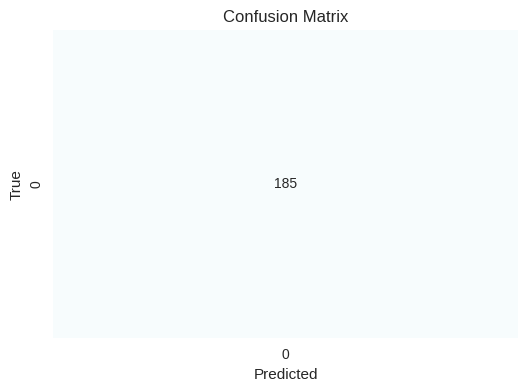

Random Forest Classifier Accuracy: 100.00%

Confusion Matrix:
[[185]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       185

    accuracy                           1.00       185
   macro avg       1.00      1.00      1.00       185
weighted avg       1.00      1.00      1.00       185


Model Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


In [ ]:
# @title Random Forest Classifier For Third Dataset

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create and fit the Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=2, min_samples_split=2, min_samples_leaf=1, max_features='auto', bootstrap=True, random_state=123)
random_forest_model.fit(X_train3, y_train3)
#displaying confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='BuPu', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Make predictions on the test set
y_pred_random_forest = random_forest_model.predict(X_test3)

# Calculate accuracy
accuracy_random_forest = accuracy_score(y_test3, y_pred_random_forest)
print("Random Forest Classifier Accuracy: {:.2%}".format(accuracy_random_forest))

# Print confusion matrix
conf_matrix_rf = confusion_matrix(y_test3, y_pred_random_forest)
print("\nConfusion Matrix:")
print(conf_matrix_rf)

# Extract metrics from classification report
class_report_rf = classification_report(y_test3, y_pred_random_forest, output_dict=True)
precision_rf = class_report_rf['weighted avg']['precision']
recall_rf = class_report_rf['weighted avg']['recall']
f1_rf = class_report_rf['weighted avg']['f1-score']

# Print classification report (precision, recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test3, y_pred_random_forest))

# Print model metrics
print("\nModel Metrics:")
print(f'Accuracy: {accuracy_random_forest:.4f}')
print(f'Precision: {precision_rf:.4f}')
print(f'Recall: {recall_rf:.4f}')
print(f'F1 Score: {f1_rf:.4f}')

In [ ]:
# @title Applying 10 folds for Third Dataset
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

# Specify the number of folds (k=10 for 10-fold cross-validation)
random_forest_model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=2, min_samples_split=2, min_samples_leaf=1, max_features='auto', bootstrap=True, random_state=123)
num_folds = 10

# Specify the cross-validation strategy (StratifiedKFold is commonly used)
cv_strategy = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=123)

# Perform 10-fold cross-validation and get accuracy scores for each fold
accuracy_scores_tree = cross_val_score(random_forest_model, X3, y3, cv=cv_strategy, scoring='accuracy')

# Print the accuracy scores for each fold
for fold, accuracy in enumerate(accuracy_scores_tree, start=1):
    print(f'Fold {fold}: Accuracy = {accuracy:.4f}')

# Print the average accuracy across all folds
average_accuracy_tree = np.mean(accuracy_scores_tree)
print(f'\nAverage Accuracy: {average_accuracy_tree:.4f}')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'

Fold 1: Accuracy = 1.0000
Fold 2: Accuracy = 1.0000
Fold 3: Accuracy = 1.0000
Fold 4: Accuracy = 1.0000
Fold 5: Accuracy = 1.0000
Fold 6: Accuracy = 1.0000
Fold 7: Accuracy = 1.0000
Fold 8: Accuracy = 1.0000
Fold 9: Accuracy = 1.0000
Fold 10: Accuracy = 0.9891

Average Accuracy: 0.9989


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


KNN Classifier Accuracy: 91.27%

Confusion Matrix:
[[1286   96]
 [ 152 1306]]


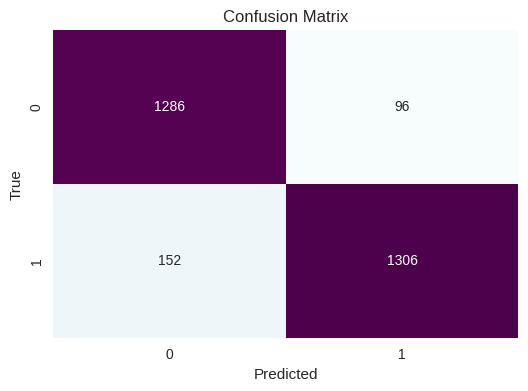


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1382
           1       0.93      0.90      0.91      1458

    accuracy                           0.91      2840
   macro avg       0.91      0.91      0.91      2840
weighted avg       0.91      0.91      0.91      2840


Model Metrics:
Accuracy: 0.9127
Precision: 0.9134
Recall: 0.9127
F1 Score: 0.9127
Specificity: 0.9305


In [ ]:
# @title K-nearest neighbors Classifier for first dataset

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

knn_model = KNeighborsClassifier(n_neighbors=9, weights='uniform', algorithm='auto', p=2, metric='euclidean', leaf_size=40, n_jobs=3)
knn_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test_resampled)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test_resampled, y_pred_knn)
print("KNN Classifier Accuracy: {:.2%}".format(accuracy_knn))

# Print confusion matrix
conf_matrix_knn = confusion_matrix(y_test_resampled, y_pred_knn)
print("\nConfusion Matrix:")
print(conf_matrix_knn)
#visualizing confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='BuPu', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Extract metrics from classification report
class_report_knn = classification_report(y_test_resampled, y_pred_knn, output_dict=True)
precision_knn = class_report_knn['weighted avg']['precision']
recall_knn = class_report_knn['weighted avg']['recall']
f1_knn = class_report_knn['weighted avg']['f1-score']

#specificity
specificity_knn = conf_matrix_knn[0, 0] / (conf_matrix_knn[0, 0] + conf_matrix_knn[0, 1])

# Print classification report (precision, recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test_resampled, y_pred_knn))

# Print model metrics
print("\nModel Metrics:")
print(f'Accuracy: {accuracy_knn:.4f}')
print(f'Precision: {precision_knn:.4f}')
print(f'Recall: {recall_knn:.4f}')
print(f'F1 Score: {f1_knn:.4f}')
print(f'Specificity: {specificity_knn:.4f}')

In [ ]:
# @title Applying 10 folds for First Dataset- kNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

# Specify the number of folds (k=10 for 10-fold cross-validation)
knn_model = KNeighborsClassifier(n_neighbors=9, weights='uniform', algorithm='auto', p=2, metric='hamming', leaf_size=40, n_jobs=3)
num_folds = 10

# Specify the cross-validation strategy (StratifiedKFold is commonly used)
cv_strategy = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=123)

# Perform 10-fold cross-validation and get accuracy scores for each fold
accuracy_scores_tree = cross_val_score(knn_model, X_resampled, y_resampled, cv=cv_strategy, scoring='accuracy')
precision = cross_val_score(knn_model, X_resampled, y_resampled, cv=cv_strategy, scoring=make_scorer(precision_score))
recall = cross_val_score(knn_model, X_resampled, y_resampled, cv=cv_strategy, scoring=make_scorer(recall_score))
f1 = cross_val_score(knn_model, X_resampled, y_resampled, cv=cv_strategy, scoring=make_scorer(f1_score))

# Print the accuracy scores for each fold
for fold, accuracy in enumerate(accuracy_scores_tree, start=1):
    print(f'Fold {fold}: Accuracy = {accuracy:.4f}')

# Print the average accuracy across all folds
average_accuracy_tree = np.mean(accuracy_scores_tree)
print(f'\nAverage Accuracy: {average_accuracy_tree:.4f}')
print(f'Average Precision: {precision.mean()}')
print(f'Average Recall: {recall.mean()}')
print(f'Average F1-score: {f1.mean()}')

Fold 1: Accuracy = 0.9176
Fold 2: Accuracy = 0.9261
Fold 3: Accuracy = 0.9148
Fold 4: Accuracy = 0.9134
Fold 5: Accuracy = 0.9246
Fold 6: Accuracy = 0.9120
Fold 7: Accuracy = 0.9275
Fold 8: Accuracy = 0.9296
Fold 9: Accuracy = 0.9183
Fold 10: Accuracy = 0.9134

Average Accuracy: 0.9197
Average Precision: 0.8876391039194281
Average Recall: 0.9612676056338028
Average F1-score: 0.9229331519265838


KNN Classifier Accuracy: 99.63%

Confusion Matrix:
[[17217   114]
 [   17 17614]]


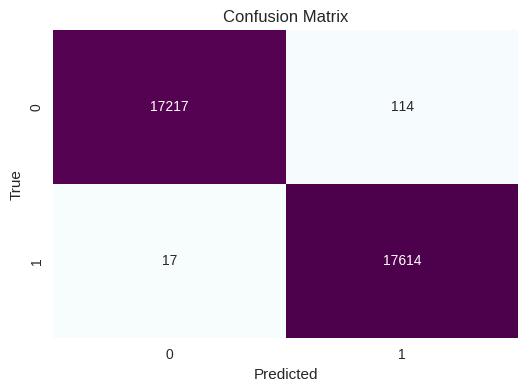


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     17331
         1.0       0.99      1.00      1.00     17631

    accuracy                           1.00     34962
   macro avg       1.00      1.00      1.00     34962
weighted avg       1.00      1.00      1.00     34962


Model Metrics:
Accuracy: 0.9963
Precision: 0.9963
Recall: 0.9963
F1 Score: 0.9963
Specificity: 0.9934


In [ ]:
# @title K-nearest neighbors Classifier for Second dataset

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

knn_model = KNeighborsClassifier(n_neighbors=9, weights='uniform', algorithm='auto', p=2, metric='euclidean', leaf_size=40, n_jobs=3)
knn_model.fit(X_train_resampled2, y_train_resampled2)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test_resampled2)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test_resampled2, y_pred_knn)
print("KNN Classifier Accuracy: {:.2%}".format(accuracy_knn))

# Print confusion matrix
conf_matrix_knn = confusion_matrix(y_test_resampled2, y_pred_knn)
print("\nConfusion Matrix:")
print(conf_matrix_knn)
#visualizing confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='BuPu', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Extract metrics from classification report
class_report_knn = classification_report(y_test_resampled2, y_pred_knn, output_dict=True)
precision_knn = class_report_knn['weighted avg']['precision']
recall_knn = class_report_knn['weighted avg']['recall']
f1_knn = class_report_knn['weighted avg']['f1-score']

#specificity
specificity_knn = conf_matrix_knn[0, 0] / (conf_matrix_knn[0, 0] + conf_matrix_knn[0, 1])

# Print classification report (precision, recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test_resampled2, y_pred_knn))

# Print model metrics
print("\nModel Metrics:")
print(f'Accuracy: {accuracy_knn:.4f}')
print(f'Precision: {precision_knn:.4f}')
print(f'Recall: {recall_knn:.4f}')
print(f'F1 Score: {f1_knn:.4f}')
print(f'Specificity: {specificity_knn:.4f}')

In [ ]:
# @title Applying 10 folds for Second Dataset- kNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

# Specify the number of folds (k=10 for 10-fold cross-validation)
knn_model = KNeighborsClassifier(n_neighbors=9, weights='uniform', algorithm='auto', p=2, metric='hamming', leaf_size=40, n_jobs=3)
num_folds = 10

# Specify the cross-validation strategy (StratifiedKFold is commonly used)
cv_strategy = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=123)

# Perform 10-fold cross-validation and get accuracy scores for each fold
accuracy_scores_tree = cross_val_score(knn_model, X_resampled2, y_resampled2, cv=cv_strategy, scoring='accuracy')
precision = cross_val_score(knn_model, X_resampled2, y_resampled2, cv=cv_strategy, scoring=make_scorer(precision_score))
recall = cross_val_score(knn_model, X_resampled2, y_resampled2, cv=cv_strategy, scoring=make_scorer(recall_score))
f1 = cross_val_score(knn_model, X_resampled2, y_resampled2, cv=cv_strategy, scoring=make_scorer(f1_score))

# Print the accuracy scores for each fold
for fold, accuracy in enumerate(accuracy_scores_tree, start=1):
    print(f'Fold {fold}: Accuracy = {accuracy:.4f}')

# Print the average accuracy across all folds
average_accuracy_tree = np.mean(accuracy_scores_tree)
print(f'\nAverage Accuracy: {average_accuracy_tree:.4f}')
print(f'Average Precision: {precision.mean()}')
print(f'Average Recall: {recall.mean()}')
print(f'Average F1-score: {f1.mean()}')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

In [ ]:
# @title K-nearest neighbour Third dataset

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

knn_model = KNeighborsClassifier(n_neighbors=9, weights='uniform', algorithm='auto', p=2, metric='euclidean', leaf_size=40, n_jobs=3)
knn_model.fit(X_train3, y_train3)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test3)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test3, y_pred_knn)
print("KNN Classifier Accuracy: {:.2%}".format(accuracy_knn))

# Print confusion matrix
conf_matrix_knn = confusion_matrix(y_test3, y_pred_knn)
print("\nConfusion Matrix:")
print(conf_matrix_knn)
#visualizing confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='BuPu', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Extract metrics from classification report
class_report_knn = classification_report(y_test3, y_pred_knn, output_dict=True)
precision_knn = class_report_knn['weighted avg']['precision']
recall_knn = class_report_knn['weighted avg']['recall']
f1_knn = class_report_knn['weighted avg']['f1-score']

# Calculating the Specificity
TN = conf_matrix_knn[0, 0]  # True Negatives
FP = conf_matrix_knn[0, 1]  # False Positives
specificity_knn = TN / (TN + FP)

# Print classification report (precision, recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test3, y_pred_knn))

# Print model metrics
print("\nModel Metrics:")
print(f'Accuracy: {accuracy_knn:.4f}')
print(f'Precision: {precision_knn:.4f}')
print(f'Recall: {recall_knn:.4f}')
print(f'F1 Score: {f1_knn:.4f}')
print(f'Specificity: {specificity_knn:.4f}')

In [ ]:
# @title Applying 10 folds for Third Dataset- kNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

# Specify the number of folds (k=10 for 10-fold cross-validation)
knn_model = KNeighborsClassifier(n_neighbors=9, weights='uniform', algorithm='auto', p=2, metric='hamming', leaf_size=40, n_jobs=3)
num_folds = 10

# Specify the cross-validation strategy (StratifiedKFold is commonly used)
cv_strategy = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=123)

# Perform 10-fold cross-validation and get accuracy scores for each fold
accuracy_scores_tree = cross_val_score(knn_model, X3, y3, cv=cv_strategy, scoring='accuracy')
precision = cross_val_score(knn_model, X3, y3, cv=cv_strategy, scoring=make_scorer(precision_score))
recall = cross_val_score(knn_model, X3, y3, cv=cv_strategy, scoring=make_scorer(recall_score))
f1 = cross_val_score(knn_model, X3, y3, cv=cv_strategy, scoring=make_scorer(f1_score))

# Print the accuracy scores for each fold
for fold, accuracy in enumerate(accuracy_scores_tree, start=1):
    print(f'Fold {fold}: Accuracy = {accuracy:.4f}')

# Print the average accuracy across all folds
average_accuracy_tree = np.mean(accuracy_scores_tree)
print(f'\nAverage Accuracy: {average_accuracy_tree:.4f}')
print(f'Average Precision: {precision.mean()}')
print(f'Average Recall: {recall.mean()}')
print(f'Average F1-score: {f1.mean()}')

In [ ]:
# @title Applying 10 folds for First Dataset
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np

# Initialize the K-Nearest Neighbors classifier
knn_model = KNeighborsClassifier(n_neighbors=9, weights='uniform', algorithm='auto', p=2, metric='euclidean', leaf_size=40, n_jobs=3)

# Specify the number of folds (k=10 for 10-fold cross-validation)
num_folds = 10
cv_strategy = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform 10-fold cross-validation and get accuracy scores for each fold
accuracy_scores_knn = cross_val_score(knn_model, X_resampled, y_resampled, cv=cv_strategy, scoring='accuracy')

# Print the accuracy scores for each fold
for fold, accuracy in enumerate(accuracy_scores_knn, start=1):
    print(f'Fold {fold}: Accuracy = {accuracy:.4f}')

# Print the average accuracy across all folds
average_accuracy_knn = np.mean(accuracy_scores_knn)
print(f'\nAverage Accuracy: {average_accuracy_knn:.4f}')

In [ ]:
# @title Applying 10 folds for Third Dataset
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np

# Initialize the K-Nearest Neighbors classifier
knn_model = KNeighborsClassifier(n_neighbors=9, weights='uniform', algorithm='auto', p=2, metric='euclidean', leaf_size=40, n_jobs=3)

# Specify the number of folds (k=10 for 10-fold cross-validation)
num_folds = 10
cv_strategy = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform 10-fold cross-validation and get accuracy scores for each fold
accuracy_scores_knn = cross_val_score(knn_model, X3, y3, cv=cv_strategy, scoring='accuracy')

# Print the accuracy scores for each fold
for fold, accuracy in enumerate(accuracy_scores_knn, start=1):
    print(f'Fold {fold}: Accuracy = {accuracy:.4f}')

# Print the average accuracy across all folds
average_accuracy_knn = np.mean(accuracy_scores_knn)
print(f'\nAverage Accuracy: {average_accuracy_knn:.4f}')

In [ ]:
# @title Applying 10 folds for Second Dataset
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

# Specify the number of folds (k=10 for 10-fold cross-validation)
knn_model = KNeighborsClassifier(n_neighbors=9, weights='uniform', algorithm='auto', p=2, metric='hamming', leaf_size=40, n_jobs=3)
num_folds = 10

# Specify the cross-validation strategy (StratifiedKFold is commonly used)
cv_strategy = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=123)

# Perform 10-fold cross-validation and get accuracy scores for each fold
accuracy_scores_tree = cross_val_score(knn_model, X_resampled2, y_resampled2, cv=cv_strategy, scoring='accuracy')

# Print the accuracy scores for each fold
for fold, accuracy in enumerate(accuracy_scores_tree, start=1):
    print(f'Fold {fold}: Accuracy = {accuracy:.4f}')

# Print the average accuracy across all folds
average_accuracy_tree = np.mean(accuracy_scores_tree)
print(f'\nAverage Accuracy: {average_accuracy_tree:.4f}')

In [ ]:
# @title SVM (Support Vector Machine) Classifier for First Dataset
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the Support Vector Machine classifier
svm_classifier = SVC(kernel='linear')  # You can choose different kernels (linear, rbf, etc.)

# Fit the SVM model to the training data
svm_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data using SVM
y_pred_svm = svm_classifier.predict(X_test_resampled)

#displaying confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='BuPu', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test_resampled, y_pred_svm)
precision_svm = precision_score(y_test_resampled, y_pred_svm)
recall_svm = recall_score(y_test_resampled, y_pred_svm)
f1_svm = f1_score(y_test_resampled, y_pred_svm)

accuracy_svm = accuracy_score(y_test_resampled, y_pred_svm)
print("SVM Classifier Accuracy: {:.2%}".format(accuracy_svm))

# Display SVM model metrics
print("\nSVM Model Metrics:")
print(f'Accuracy: {accuracy_svm:.4f}')
print(f'Precision: {precision_svm:.4f}')
print(f'Recall: {recall_svm:.4f}')
print(f'F1 Score: {f1_svm:.4f}')

In [ ]:
# # @title Applying 10 folds for First Dataset
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import StratifiedKFold, cross_val_score
# import numpy as np

# # Specify the number of folds (k=10 for 10-fold cross-validation)
# svm_classifier = SVC(kernel='linear')
# num_folds = 10

# # Specify the cross-validation strategy (StratifiedKFold is commonly used)
# cv_strategy = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=123)

# # Perform 10-fold cross-validation and get accuracy scores for each fold
# accuracy_scores_tree = cross_val_score(svm_classifier, X_resampled, y_resampled, cv=cv_strategy, scoring='accuracy')

# # Print the accuracy scores for each fold
# for fold, accuracy in enumerate(accuracy_scores_tree, start=1):
#     print(f'Fold {fold}: Accuracy = {accuracy:.4f}')

# # Print the average accuracy across all folds
# average_accuracy_tree = np.mean(accuracy_scores_tree)
# print(f'\nAverage Accuracy: {average_accuracy_tree:.4f}')

In [ ]:
# @title SVM (Support Vector Machine) Classifier for Second Dataset
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the Support Vector Machine classifier
svm_classifier = SVC(kernel='linear')  # You can choose different kernels (linear, rbf, etc.)

# Fit the SVM model to the training data
svm_classifier.fit(X_train_resampled2, y_train_resampled2)

# Make predictions on the test data using SVM
y_pred_svm = svm_classifier.predict(X_test_resampled2)

#displaying confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='BuPu', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test_resampled2, y_pred_svm)
precision_svm = precision_score(y_test_resampled2, y_pred_svm)
recall_svm = recall_score(y_test_resampled2, y_pred_svm)
f1_svm = f1_score(y_test_resampled2, y_pred_svm)

accuracy_svm = accuracy_score(y_test_resampled2, y_pred_svm)
print("SVM Classifier Accuracy: {:.2%}".format(accuracy_svm))

# Display SVM model metrics
print("\nSVM Model Metrics:")
print(f'Accuracy: {accuracy_svm:.4f}')
print(f'Precision: {precision_svm:.4f}')
print(f'Recall: {recall_svm:.4f}')
print(f'F1 Score: {f1_svm:.4f}')

In [ ]:
# # @title Applying 10 folds for Second Dataset
# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import StratifiedKFold, cross_val_score
# import numpy as np

# # Specify the number of folds (k=10 for 10-fold cross-validation)
# svm_classifier = SVC(kernel='linear')
# num_folds = 10

# # Specify the cross-validation strategy (StratifiedKFold is commonly used)
# cv_strategy = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=123)

# # Perform 10-fold cross-validation and get accuracy scores for each fold
# accuracy_scores_tree = cross_val_score(svm_classifier, X_resampled2, y_resampled2, cv=cv_strategy, scoring='accuracy')

# # Print the accuracy scores for each fold
# for fold, accuracy in enumerate(accuracy_scores_tree, start=1):
#     print(f'Fold {fold}: Accuracy = {accuracy:.4f}')

# # Print the average accuracy across all folds
# average_accuracy_tree = np.mean(accuracy_scores_tree)
# print(f'\nAverage Accuracy: {average_accuracy_tree:.4f}')

In [ ]:
# @title SVM (Support Vector Machine) Classifier for Third Dataset
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Normalize numerical columns using StandardScaler
scaler = StandardScaler()
X_train3_scaled = scaler.fit_transform(X_train3)
X_test3_scaled = scaler.transform(X_test3)

# Initialize the Support Vector Machine classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Fit the SVM model to the training data
svm_classifier.fit(X_train3_scaled, y_train3)

# Make predictions on the test data using SVM
y_pred_svm = svm_classifier.predict(X_test3_scaled)

# Display confusion matrix
conf_matrix = confusion_matrix(y_test3, y_pred_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='BuPu', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test3, y_pred_svm)
precision_svm = precision_score(y_test3, y_pred_svm)
recall_svm = recall_score(y_test3, y_pred_svm)
f1_svm = f1_score(y_test3, y_pred_svm)

# Display SVM model metrics
print("SVM Classifier Accuracy: {:.2%}".format(accuracy_svm))
print("\nSVM Model Metrics:")
print(f'Accuracy: {accuracy_svm:.4f}')
print(f'Precision: {precision_svm:.4f}')
print(f'Recall: {recall_svm:.4f}')
print(f'F1 Score: {f1_svm:.4f}')


In [ ]:
# # @title Applying 10 folds for Third Dataset
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

# Specify the number of folds (k=10 for 10-fold cross-validation)
svm_classifier = SVC(kernel='linear')
num_folds = 10

# Specify the cross-validation strategy (StratifiedKFold is commonly used)
cv_strategy = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=123)

# Perform 10-fold cross-validation and get accuracy scores for each fold
accuracy_scores_tree = cross_val_score(svm_classifier, X3, y3, cv=cv_strategy, scoring='accuracy')

# Print the accuracy scores for each fold
for fold, accuracy in enumerate(accuracy_scores_tree, start=1):
    print(f'Fold {fold}: Accuracy = {accuracy:.4f}')

# Print the average accuracy across all folds
average_accuracy_tree = np.mean(accuracy_scores_tree)
print(f'\nAverage Accuracy: {average_accuracy_tree:.4f}')

In [ ]:
# @title AdaBoost Classifier For First Dataset

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create and fit the base classifier (Decision Tree)
base_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)

# Create AdaBoostClassifier with 50 weak learners
adaboost_model = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)
adaboost_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_adaboost = adaboost_model.predict(X_test_resampled)

# Calculate accuracy
accuracy_adaboost = accuracy_score(y_test_resampled, y_pred_adaboost)
print("AdaBoost Classifier Accuracy: {:.2%}".format(accuracy_adaboost))

# Print confusion matrix
conf_matrix_adaboost = confusion_matrix(y_test_resampled, y_pred_adaboost)
print("\nConfusion Matrix:")
print(conf_matrix_adaboost)
#visualizing confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_adaboost, annot=True, fmt='d', cmap='BuPu', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Extract metrics from classification report
class_report_adaboost = classification_report(y_test_resampled, y_pred_adaboost, output_dict=True)
precision_adaboost = class_report_adaboost['weighted avg']['precision']
recall_adaboost = class_report_adaboost['weighted avg']['recall']
f1_adaboost = class_report_adaboost['weighted avg']['f1-score']

# Print classification report (precision, recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test_resampled, y_pred_adaboost))

# Print model metrics
print("\nModel Metrics:")
print(f'Accuracy: {accuracy_adaboost:.4f}')
print(f'Precision: {precision_adaboost:.4f}')
print(f'Recall: {recall_adaboost:.4f}')
print(f'F1 Score: {f1_adaboost:.4f}')

In [ ]:
# # @title Applying 10 folds for First Dataset

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

# Specify the number of folds (k=10 for 10-fold cross-validation)
# Create and fit the base classifier (Decision Tree)
base_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)

# Create AdaBoostClassifier with 50 weak learners
adaboost_model = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)
num_folds = 10

# Specify the cross-validation strategy (StratifiedKFold is commonly used)
cv_strategy = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=123)

# Perform 10-fold cross-validation and get accuracy scores for each fold
accuracy_scores_tree = cross_val_score(adaboost_model, X_resampled, y_resampled, cv=cv_strategy, scoring='accuracy')

# Print the accuracy scores for each fold
for fold, accuracy in enumerate(accuracy_scores_tree, start=1):
    print(f'Fold {fold}: Accuracy = {accuracy:.4f}')

# Print the average accuracy across all folds
average_accuracy_tree = np.mean(accuracy_scores_tree)
print(f'\nAverage Accuracy: {average_accuracy_tree:.4f}')

In [ ]:
# @title AdaBoost Classifier For Second Dataset

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create and fit the base classifier (Decision Tree)
base_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)

# Create AdaBoostClassifier with 50 weak learners
adaboost_model = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)
adaboost_model.fit(X_train_resampled2, y_train_resampled2)

# Make predictions on the test set
y_pred_adaboost = adaboost_model.predict(X_test_resampled2)

# Calculate accuracy
accuracy_adaboost = accuracy_score(y_test_resampled2, y_pred_adaboost)
print("AdaBoost Classifier Accuracy: {:.2%}".format(accuracy_adaboost))

# Print confusion matrix
conf_matrix_adaboost = confusion_matrix(y_test_resampled2, y_pred_adaboost)
print("\nConfusion Matrix:")
print(conf_matrix_adaboost)
#visualizing confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_adaboost, annot=True, fmt='d', cmap='BuPu', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Extract metrics from classification report
class_report_adaboost = classification_report(y_test_resampled2, y_pred_adaboost, output_dict=True)
precision_adaboost = class_report_adaboost['weighted avg']['precision']
recall_adaboost = class_report_adaboost['weighted avg']['recall']
f1_adaboost = class_report_adaboost['weighted avg']['f1-score']

# Print classification report (precision, recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test_resampled2, y_pred_adaboost))

# Print model metrics
print("\nModel Metrics:")
print(f'Accuracy: {accuracy_adaboost:.4f}')
print(f'Precision: {precision_adaboost:.4f}')
print(f'Recall: {recall_adaboost:.4f}')
print(f'F1 Score: {f1_adaboost:.4f}')

In [ ]:

# @title Applying 10 folds for Second Dataset
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

# Specify the number of folds (k=10 for 10-fold cross-validation)
# Create and fit the base classifier (Decision Tree)
base_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)

# Create AdaBoostClassifier with 50 weak learners
adaboost_model = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)
num_folds = 10

# Specify the cross-validation strategy (StratifiedKFold is commonly used)
cv_strategy = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=123)

# Perform 10-fold cross-validation and get accuracy scores for each fold
accuracy_scores_tree = cross_val_score(adaboost_model, X_resampled2, y_resampled2, cv=cv_strategy, scoring='accuracy')

# Print the accuracy scores for each fold
for fold, accuracy in enumerate(accuracy_scores_tree, start=1):
    print(f'Fold {fold}: Accuracy = {accuracy:.4f}')

# Print the average accuracy across all folds
average_accuracy_tree = np.mean(accuracy_scores_tree)
print(f'\nAverage Accuracy: {average_accuracy_tree:.4f}')

In [ ]:
# @title AdaBoost Classifier For Third Dataset

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create and fit the base classifier (Decision Tree)
base_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)

# Create AdaBoostClassifier with 50 weak learners
adaboost_model = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)
adaboost_model.fit(X_train3, y_train3)

# Make predictions on the test set
y_pred_adaboost = adaboost_model.predict(X_test3)

# Calculate accuracy
accuracy_adaboost = accuracy_score(y_test3, y_pred_adaboost)
print("AdaBoost Classifier Accuracy: {:.2%}".format(accuracy_adaboost))

# Print confusion matrix
conf_matrix_adaboost = confusion_matrix(y_test3, y_pred_adaboost)
print("\nConfusion Matrix:")
print(conf_matrix_adaboost)
#visualizing confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_adaboost, annot=True, fmt='d', cmap='BuPu', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Extract metrics from classification report
class_report_adaboost = classification_report(y_test3, y_pred_adaboost, output_dict=True)
precision_adaboost = class_report_adaboost['weighted avg']['precision']
recall_adaboost = class_report_adaboost['weighted avg']['recall']
f1_adaboost = class_report_adaboost['weighted avg']['f1-score']

# Print classification report (precision, recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test3, y_pred_adaboost))

# Print model metrics
print("\nModel Metrics:")
print(f'Accuracy: {accuracy_adaboost:.4f}')
print(f'Precision: {precision_adaboost:.4f}')
print(f'Recall: {recall_adaboost:.4f}')
print(f'F1 Score: {f1_adaboost:.4f}')

In [ ]:
# # @title Applying 10 folds for Third Dataset

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

# Specify the number of folds (k=10 for 10-fold cross-validation)
# Create and fit the base classifier (Decision Tree)
base_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)

# Create AdaBoostClassifier with 50 weak learners
adaboost_model = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)
num_folds = 10

# Specify the cross-validation strategy (StratifiedKFold is commonly used)
cv_strategy = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=123)

# Perform 10-fold cross-validation and get accuracy scores for each fold
accuracy_scores_tree = cross_val_score(adaboost_model, X3, y3, cv=cv_strategy, scoring='accuracy')

# Print the accuracy scores for each fold
for fold, accuracy in enumerate(accuracy_scores_tree, start=1):
    print(f'Fold {fold}: Accuracy = {accuracy:.4f}')

# Print the average accuracy across all folds
average_accuracy_tree = np.mean(accuracy_scores_tree)
print(f'\nAverage Accuracy: {average_accuracy_tree:.4f}')

In [ ]:
# @title Naieve Bayes Classifier For First Dataset

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create and fit the Gaussian Naive Bayes model
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_naive_bayes = naive_bayes_model.predict(X_test_resampled)

# Calculate accuracy
accuracy_naive_bayes = accuracy_score(y_test_resampled, y_pred_naive_bayes)
print("Naive Bayes Classifier Accuracy: {:.2%}".format(accuracy_naive_bayes))

# Print confusion matrix
conf_matrix_nb = confusion_matrix(y_test_resampled, y_pred_naive_bayes)
print("\nConfusion Matrix:")
print(conf_matrix_nb)
#visualizing confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='BuPu', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Extract metrics from classification report
class_report_nb = classification_report(y_test_resampled, y_pred_naive_bayes, output_dict=True)
precision_nb = class_report_nb['weighted avg']['precision']
recall_nb = class_report_nb['weighted avg']['recall']
f1_nb = class_report_nb['weighted avg']['f1-score']

# Print classification report (precision, recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test_resampled, y_pred_naive_bayes))

# Print model metrics
print("\nModel Metrics:")
print(f'Accuracy: {accuracy_naive_bayes:.4f}')
print(f'Precision: {precision_nb:.4f}')
print(f'Recall: {recall_nb:.4f}')
print(f'F1 Score: {f1_nb:.4f}')

In [ ]:

# @title Applying 10 folds for Second Dataset

from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
import numpy as np

# Specify the number of folds (k=10 for 10-fold cross-validation)
# Create and fit the base classifier (Decision Tree)
# base_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)

# Create AdaBoostClassifier with 50 weak learners
naive_bayes_model = GaussianNB()
num_folds = 10

# Specify the cross-validation strategy (StratifiedKFold is commonly used)
cv_strategy = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=123)

# Perform 10-fold cross-validation and get accuracy scores for each fold
accuracy_scores_tree = cross_val_score(naive_bayes_model, X_resampled, y_resampled, cv=cv_strategy, scoring='accuracy')
precision = cross_val_score(naive_bayes_model, X_resampled, y_resampled, cv=cv_strategy, scoring=make_scorer(precision_score))
recall = cross_val_score(naive_bayes_model, X_resampled, y_resampled, cv=cv_strategy, scoring=make_scorer(recall_score))
f1 = cross_val_score(naive_bayes_model, X_resampled, y_resampled, cv=cv_strategy, scoring=make_scorer(f1_score))

# Print the accuracy scores for each fold
for fold, accuracy in enumerate(accuracy_scores_tree, start=1):
    print(f'Fold {fold}: Accuracy = {accuracy:.4f}')

# Print the average accuracy across all folds
average_accuracy_tree = np.mean(accuracy_scores_tree)
print(f'\nAverage Accuracy: {average_accuracy_tree:.4f}')
print(f'Average Precision: {precision.mean()}')
print(f'Average Recall: {recall.mean()}')
print(f'Average F1-score: {f1.mean()}')

In [ ]:
# @title Naieve Bayes Classifier For Second Dataset

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create and fit the Gaussian Naive Bayes model
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train_resampled2, y_train_resampled2)

# Make predictions on the test set
y_pred_naive_bayes = naive_bayes_model.predict(X_test_resampled2)

# Calculate accuracy
accuracy_naive_bayes = accuracy_score(y_test_resampled2, y_pred_naive_bayes)
print("Naive Bayes Classifier Accuracy: {:.2%}".format(accuracy_naive_bayes))

# Print confusion matrix
conf_matrix_nb = confusion_matrix(y_test_resampled2, y_pred_naive_bayes)
print("\nConfusion Matrix:")
print(conf_matrix_nb)
#visualizing confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='BuPu', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Extract metrics from classification report
class_report_nb = classification_report(y_test_resampled2, y_pred_naive_bayes, output_dict=True)
precision_nb = class_report_nb['weighted avg']['precision']
recall_nb = class_report_nb['weighted avg']['recall']
f1_nb = class_report_nb['weighted avg']['f1-score']

# Print classification report (precision, recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test_resampled2, y_pred_naive_bayes))

# Print model metrics
print("\nModel Metrics:")
print(f'Accuracy: {accuracy_naive_bayes:.4f}')
print(f'Precision: {precision_nb:.4f}')
print(f'Recall: {recall_nb:.4f}')
print(f'F1 Score: {f1_nb:.4f}')

In [ ]:

# @title Applying 10 folds for Second Dataset

from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
import numpy as np

# Specify the number of folds (k=10 for 10-fold cross-validation)
# Create and fit the base classifier (Decision Tree)
# base_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)

# Create AdaBoostClassifier with 50 weak learners
naive_bayes_model = GaussianNB()
num_folds = 10

# Specify the cross-validation strategy (StratifiedKFold is commonly used)
cv_strategy = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=123)

# Perform 10-fold cross-validation and get accuracy scores for each fold
accuracy_scores_tree = cross_val_score(naive_bayes_model, X_resampled2, y_resampled2, cv=cv_strategy, scoring='accuracy')
precision = cross_val_score(naive_bayes_model, X_resampled2, y_resampled2, cv=cv_strategy, scoring=make_scorer(precision_score))
recall = cross_val_score(naive_bayes_model, X_resampled2, y_resampled2, cv=cv_strategy, scoring=make_scorer(recall_score))
f1 = cross_val_score(naive_bayes_model, X_resampled2, y_resampled2, cv=cv_strategy, scoring=make_scorer(f1_score))

# Print the accuracy scores for each fold
for fold, accuracy in enumerate(accuracy_scores_tree, start=1):
    print(f'Fold {fold}: Accuracy = {accuracy:.4f}')

# Print the average accuracy across all folds
average_accuracy_tree = np.mean(accuracy_scores_tree)
print(f'\nAverage Accuracy: {average_accuracy_tree:.4f}')
print(f'Average Precision: {precision.mean()}')
print(f'Average Recall: {recall.mean()}')
print(f'Average F1-score: {f1.mean()}')

In [ ]:
# @title Naieve Bayes Classifier For Third Dataset

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create and fit the Gaussian Naive Bayes model
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train3, y_train3)

# Make predictions on the test set
y_pred_naive_bayes = naive_bayes_model.predict(X_test3)

# Calculate accuracy
accuracy_naive_bayes = accuracy_score(y_test3, y_pred_naive_bayes)
print("Naive Bayes Classifier Accuracy: {:.2%}".format(accuracy_naive_bayes))

# Print confusion matrix
conf_matrix_nb = confusion_matrix(y_test3, y_pred_naive_bayes)
print("\nConfusion Matrix:")
print(conf_matrix_nb)
#visualizing confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='BuPu', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Extract metrics from classification report
class_report_nb = classification_report(y_test3, y_pred_naive_bayes, output_dict=True)
precision_nb = class_report_nb['weighted avg']['precision']
recall_nb = class_report_nb['weighted avg']['recall']
f1_nb = class_report_nb['weighted avg']['f1-score']

# Print classification report (precision, recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test3, y_pred_naive_bayes))

# Print model metrics
print("\nModel Metrics:")
print(f'Accuracy: {accuracy_naive_bayes:.4f}')
print(f'Precision: {precision_nb:.4f}')
print(f'Recall: {recall_nb:.4f}')
print(f'F1 Score: {f1_nb:.4f}')

In [ ]:

# @title Applying 10 folds for Third Dataset

from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
import numpy as np

# Specify the number of folds (k=10 for 10-fold cross-validation)
# Create and fit the base classifier (Decision Tree)
# base_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)

# Create AdaBoostClassifier with 50 weak learners
naive_bayes_model = GaussianNB()
num_folds = 10

# Specify the cross-validation strategy (StratifiedKFold is commonly used)
cv_strategy = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=123)

# Perform 10-fold cross-validation and get accuracy scores for each fold
accuracy_scores_tree = cross_val_score(naive_bayes_model, X3, y3, cv=cv_strategy, scoring='accuracy')
precision = cross_val_score(naive_bayes_model, X3, y3, cv=cv_strategy, scoring=make_scorer(precision_score))
recall = cross_val_score(naive_bayes_model, X3, y3, cv=cv_strategy, scoring=make_scorer(recall_score))
f1 = cross_val_score(naive_bayes_model, X3, y3, cv=cv_strategy, scoring=make_scorer(f1_score))

# Print the accuracy scores for each fold
for fold, accuracy in enumerate(accuracy_scores_tree, start=1):
    print(f'Fold {fold}: Accuracy = {accuracy:.4f}')

# Print the average accuracy across all folds
average_accuracy_tree = np.mean(accuracy_scores_tree)
print(f'\nAverage Accuracy: {average_accuracy_tree:.4f}')
print(f'Average Precision: {precision.mean()}')
print(f'Average Recall: {recall.mean()}')
print(f'Average F1-score: {f1.mean()}')

In [ ]:
# @title Neural Networks Classifier For First Dataset
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a simple neural network
model = Sequential()
model.add(Dense(64, input_dim=X_train_resampled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=32, validation_data=(X_test_resampled, y_test_resampled))

# Make predictions on the test set
y_pred_nn = (model.predict(X_test_resampled) > 0.5).astype(int)

# Calculate accuracy
accuracy_nn = accuracy_score(y_test_resampled, y_pred_nn)
print("Neural Network Accuracy: {:.2%}".format(accuracy_nn))

# Print confusion matrix
conf_matrix_nn = confusion_matrix(y_test_resampled, y_pred_nn)
print("\nConfusion Matrix:")
print(conf_matrix_nn)

# Calculating the Specificity
TN = conf_matrix_nn[0, 0]  # True Negatives
FP = conf_matrix_nn[0, 1]  # False Positives
specificity = TN / (TN + FP)

#visualizing confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_nn, annot=True, fmt='d', cmap='BuPu', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Print classification report (precision, recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test_resampled, y_pred_nn))

# Extract metrics from classification report
class_report_nn = classification_report(y_test_resampled, y_pred_nn, output_dict=True)
precision_nn= class_report_nn['weighted avg']['precision']
recall_nn= class_report_nn['weighted avg']['recall']
f1_nn= class_report_nn['weighted avg']['f1-score']

# Print model metrics
print("\nModel Metrics:")
print(f'Accuracy: {accuracy_nn:.4f}')
print(f'Precision: {precision_nn:.4f}')
print(f'Recall: {recall_nn:.4f}')
print(f'F1 Score: {f1_nn:.4f}')
print(f'Specificity: {specificity:.4f}')


In [ ]:
# @title Neural Networks Classifier For Second Dataset
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a simple neural network
model = Sequential()
model.add(Dense(64, input_dim=X_train_resampled2.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_resampled2, y_train_resampled2, epochs=10, batch_size=32, validation_data=(X_test_resampled2, y_test_resampled2))

# Make predictions on the test set
y_pred_nn = (model.predict(X_test_resampled2) > 0.5).astype(int)

# Calculate accuracy
accuracy_nn = accuracy_score(y_test_resampled2, y_pred_nn)
print("Neural Network Accuracy: {:.2%}".format(accuracy_nn))

# Print confusion matrix
conf_matrix_nn = confusion_matrix(y_test_resampled2, y_pred_nn)
print("\nConfusion Matrix:")
print(conf_matrix_nn)

# Calculating the Specificity
TN = conf_matrix_nn[0, 0]  # True Negatives
FP = conf_matrix_nn[0, 1]  # False Positives
specificity = TN / (TN + FP)

#visualizing confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_nn, annot=True, fmt='d', cmap='BuPu', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



# Print classification report (precision, recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test_resampled2, y_pred_nn))

# Extract metrics from classification report
class_report_nn = classification_report(y_test_resampled2, y_pred_nn, output_dict=True)
precision_nn= class_report_nn['weighted avg']['precision']
recall_nn= class_report_nn['weighted avg']['recall']
f1_nn= class_report_nn['weighted avg']['f1-score']

# Print model metrics
print("\nModel Metrics:")
print(f'Accuracy: {accuracy_nn:.4f}')
print(f'Precision: {precision_nn:.4f}')
print(f'Recall: {recall_nn:.4f}')
print(f'F1 Score: {f1_nn:.4f}')
print(f'Specificity: {specificity:.4f}')

In [ ]:
# @title Neural Networks Classifier For Third Dataset
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a simple neural network
model = Sequential()
model.add(Dense(64, input_dim=X_train3.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train3, y_train3, epochs=10, batch_size=32, validation_data=(X_test3, y_test3))

# Make predictions on the test set
y_pred_nn = (model.predict(X_test3) > 0.5).astype(int)

# Calculate accuracy
accuracy_nn = accuracy_score(y_test3, y_pred_nn)
print("Neural Network Accuracy: {:.2%}".format(accuracy_nn))

# Print confusion matrix
conf_matrix_nn = confusion_matrix(y_test3, y_pred_nn)
print("\nConfusion Matrix:")
print(conf_matrix_nn)

# Calculating the Specificity
TN = conf_matrix_nn[0, 0]  # True Negatives
FP = conf_matrix_nn[0, 1]  # False Positives
specificity = TN / (TN + FP)

#visualizing confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_nn, annot=True, fmt='d', cmap='BuPu', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



# Print classification report (precision, recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test3, y_pred_nn))

# Extract metrics from classification report
class_report_nn = classification_report(y_test3, y_pred_nn, output_dict=True)
precision_nn= class_report_nn['weighted avg']['precision']
recall_nn= class_report_nn['weighted avg']['recall']
f1_nn= class_report_nn['weighted avg']['f1-score']

# Print model metrics
print("\nModel Metrics:")
print(f'Accuracy: {accuracy_nn:.4f}')
print(f'Precision: {precision_nn:.4f}')
print(f'Recall: {recall_nn:.4f}')
print(f'F1 Score: {f1_nn:.4f}')
print(f'Specificity: {specificity:.4f}')